**Dataset Features (40,910 rows):**

---
1. **gender**: patient's gender (1: male; 0: female).
2. **age**: patient's age (in years).
3. **hypertension**: patient has ever had hypertension (1) or not (0).
4. **heart_disease**: patient has ever had heart_disease(1) or not (0).
5. **ever_married**: patient married (1) or not (0).
6. **work_type**: patient job type: 0 - Never_worked, 1 - children, 2 - Govt_job, 3 - Self-employed, 4 - Private.
7. **Residence_type**: patient area: 1 - Urban, 0 - Rural.
8. **avg_glucose_level**: patient average blood sugar level.
9. **bmi**: Body Mass Index.
10. **smoking_status**: 1 - smokes, 0 - never smoked.

---


11. **stroke**: Whether the patient has stroke (1) or not (0).



#**1. Import Libraries**

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve, balanced_accuracy_score
import six
import sys
sys.modules['sklearn.externals.six'] = six
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

data = pd.read_csv(r'..Stroke\stroke_data.csv')

#**2. EDA - Exploratory Data Analysis**

###**2.1 General**

Data Exploratory:

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


There are 3 rows that are missing a value in the "gender" column - because of the negligible count, I will arbitrarily set them to be female, i.e. 0.

In [3]:
data["sex"].fillna(0, inplace = True)
data = data.drop(columns = ['avg_glucose_level'])

In [4]:
#Check if there are NA values.
data.isnull().sum().any()

False

In [5]:
#Check if there are duplicate values.
data = data.drop_duplicates()
data.duplicated().sum()

0

Now, there is no missing/duplicate data.

In [6]:
data.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,36.6,1,1
1,1.0,42.0,0,1,1,4,0,32.5,0,1
2,0.0,61.0,0,0,1,4,1,34.4,1,1
3,1.0,41.0,1,0,1,3,0,24.0,0,1
4,1.0,85.0,0,0,1,4,1,29.0,1,1


In [7]:
data.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke
count,40341.00000,40341.000000,40341.000000,40341.000000,40341.000000,40341.000000,40341.000000,40341.000000,40341.000000,40341.000000
mean,0.55420,51.331127,0.216777,0.129496,0.820158,3.457252,0.514291,30.437166,0.489626,0.501425
std,0.49706,21.661450,0.412055,0.335752,0.384060,0.783214,0.499802,6.864085,0.499899,0.500004
min,0.00000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.500000,0.000000,0.000000
25%,0.00000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,25.800000,0.000000,0.000000
50%,1.00000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,29.400000,0.000000,1.000000
75%,1.00000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,34.100000,1.000000,1.000000
max,1.00000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,92.000000,1.000000,1.000000


To analyze the data in a better way, I decided to convert the coding to the real values.

In [8]:
data_vis = data.copy()

In [9]:
data_vis.sex[data_vis['sex'] == 0] = 'Female'
data_vis.sex[data_vis['sex'] == 1] = 'Male'

data_vis.hypertension[data_vis['hypertension'] == 0] = 'Not had hypertension'
data_vis.hypertension[data_vis['hypertension'] == 1] = 'Had hypertension'

data_vis.heart_disease[data_vis['heart_disease'] == 0] = 'Not had heart disease'
data_vis.heart_disease[data_vis['heart_disease'] == 1] = 'Had heart disease'

data_vis.ever_married[data_vis['ever_married'] == 0] = 'No'
data_vis.ever_married[data_vis['ever_married'] == 1] = 'Yes'

data_vis.work_type[data_vis['work_type'] == 0] = 'Never worked'
data_vis.work_type[data_vis['work_type'] == 1] = 'Children'
data_vis.work_type[data_vis['work_type'] == 2] = 'Govt job'
data_vis.work_type[data_vis['work_type'] == 3] = 'Self-employed'
data_vis.work_type[data_vis['work_type'] == 4] = 'Private'

data_vis.Residence_type[data_vis['Residence_type'] == 0] = 'Urban'
data_vis.Residence_type[data_vis['Residence_type'] == 1] = 'Rural'

data_vis.smoking_status[data_vis['smoking_status'] == 0] = 'Never smoked'
data_vis.smoking_status[data_vis['smoking_status'] == 1] = 'Smokes'

data_vis.stroke[data_vis['stroke'] == 0] = 'No'
data_vis.stroke[data_vis['stroke'] == 1] = 'Yes'

In [10]:
unique_values = {}
for col in data_vis.columns:
    unique_values[col] = data_vis[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()
data_vis

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke
0,Male,63.0,Not had hypertension,Had heart disease,Yes,Private,Rural,36.6,Smokes,Yes
1,Male,42.0,Not had hypertension,Had heart disease,Yes,Private,Urban,32.5,Never smoked,Yes
2,Female,61.0,Not had hypertension,Not had heart disease,Yes,Private,Rural,34.4,Smokes,Yes
3,Male,41.0,Had hypertension,Not had heart disease,Yes,Self-employed,Urban,24.0,Never smoked,Yes
4,Male,85.0,Not had hypertension,Not had heart disease,Yes,Private,Rural,29.0,Smokes,Yes
...,...,...,...,...,...,...,...,...,...,...
40905,Male,38.0,Not had hypertension,Not had heart disease,No,Private,Rural,29.7,Smokes,No
40906,Female,53.0,Not had hypertension,Not had heart disease,Yes,Private,Urban,40.8,Never smoked,No
40907,Male,32.0,Not had hypertension,Not had heart disease,Yes,Govt job,Urban,33.2,Never smoked,No
40908,Male,42.0,Not had hypertension,Not had heart disease,Yes,Self-employed,Urban,34.5,Never smoked,No


1. The "work_type" column will need One Hot Encoder to process in nominal categorical data.
2. "age", "avg_glucose_level" and "bmi" columns will be processed using Binning or Scaling.

###**2.2 Frequency of the value of the features in the dataset.**

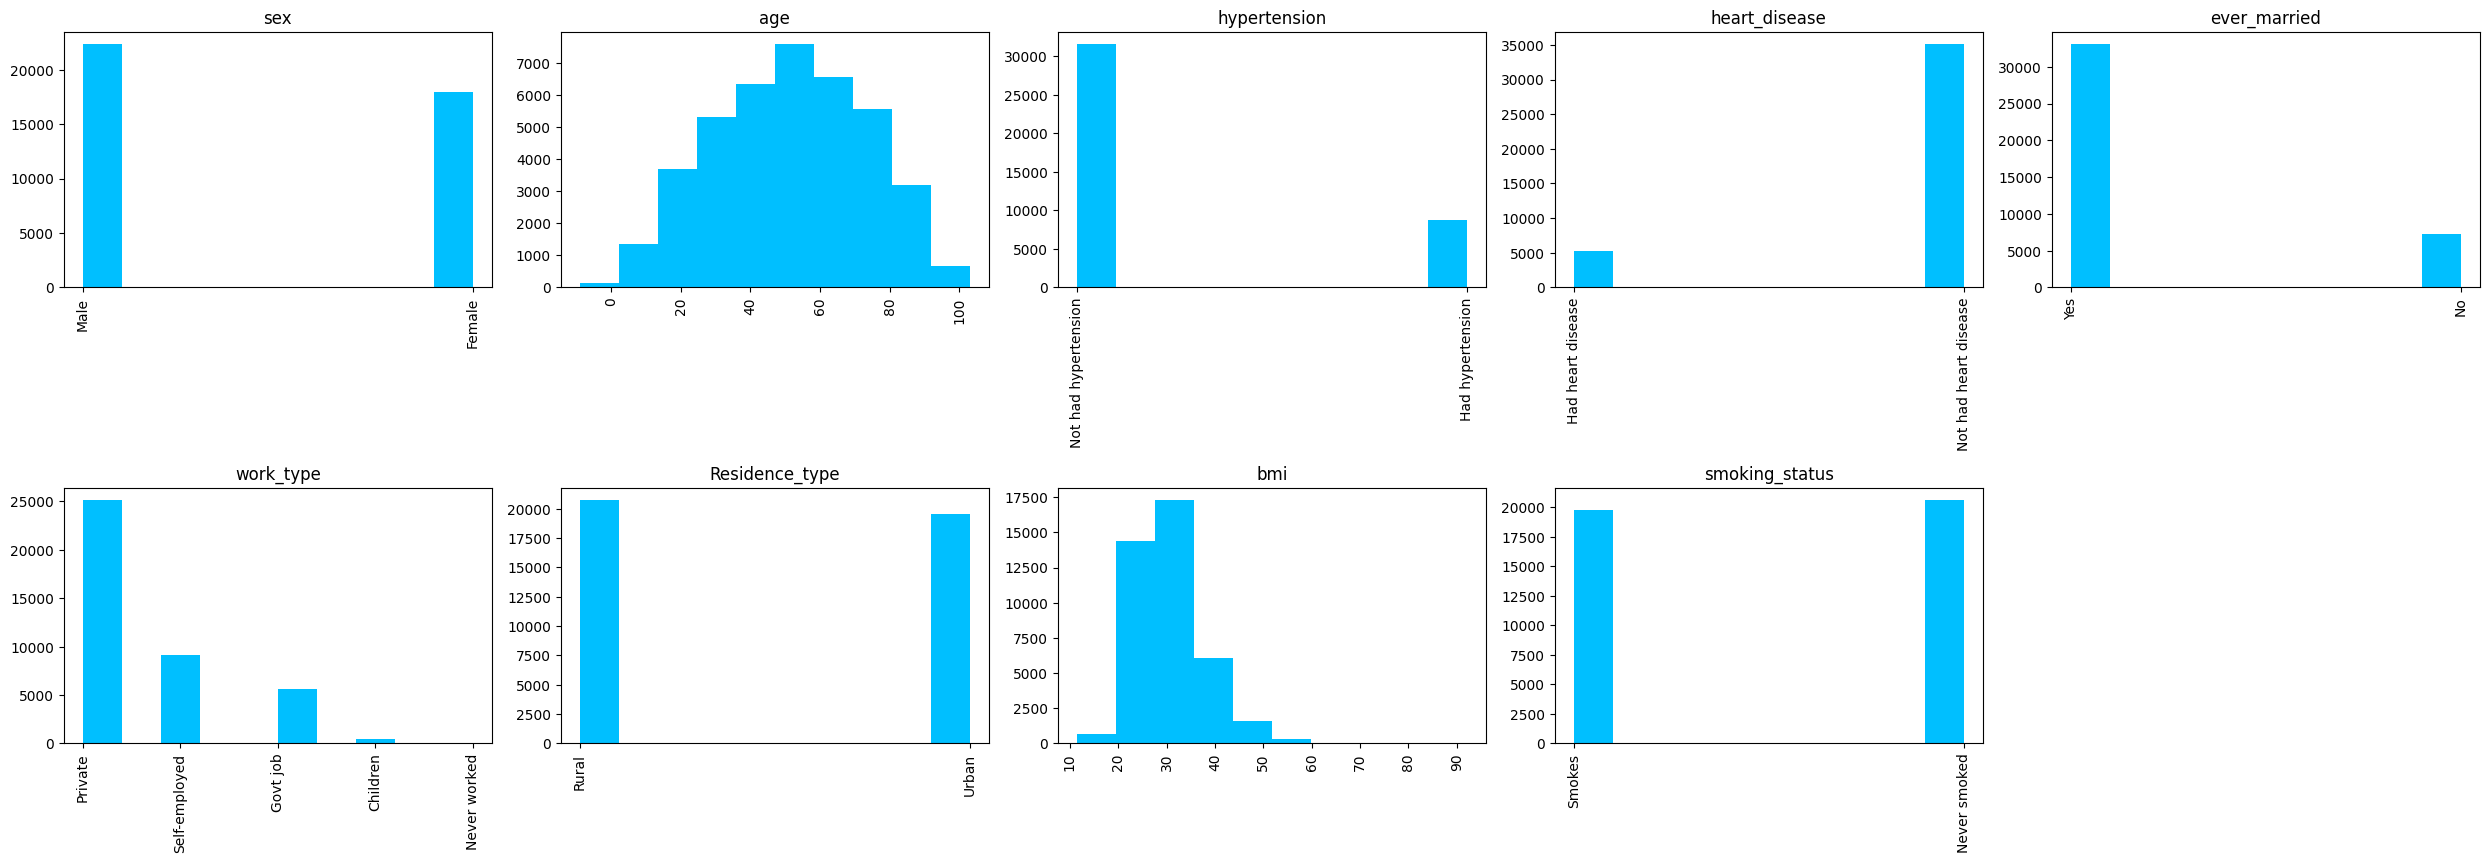

In [11]:
# All data columns except for color
feature_cols = [x for x in data_vis.columns if x not in 'stroke']
plt.figure(figsize=(25,35))
# loop for subplots
for i in range(len(feature_cols)):
    plt.subplot(8,5,i+1)
    plt.title(feature_cols[i])
    plt.xticks(rotation=90)
    plt.hist(data_vis[feature_cols[i]],color = "deepskyblue")
    
plt.tight_layout()

There can't be a negative age - drop these rows.

In [12]:
data = data.drop(data[data.age < 0].index)
data_vis = data_vis.drop(data_vis[data_vis.age < 0].index)
len(data. index)

40283

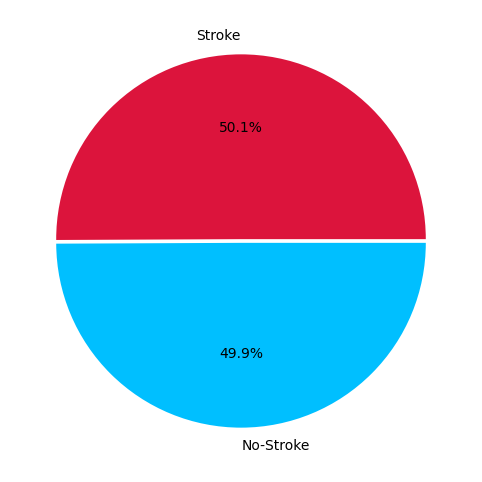

In [13]:
# Traget values frequency
plt.figure(figsize=(8,6))
labels = ['Stroke', 'No-Stroke']
sizes = [data_vis['stroke'].value_counts()['Yes'],data_vis['stroke'].value_counts()['No']]
colors = ['crimson', 'deepskyblue']
explode = (0.01,0.01)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%', colors=colors, data = data_vis);

The prediction column classes are balanced.

###**2.3 Correlation between each feature and stroke**

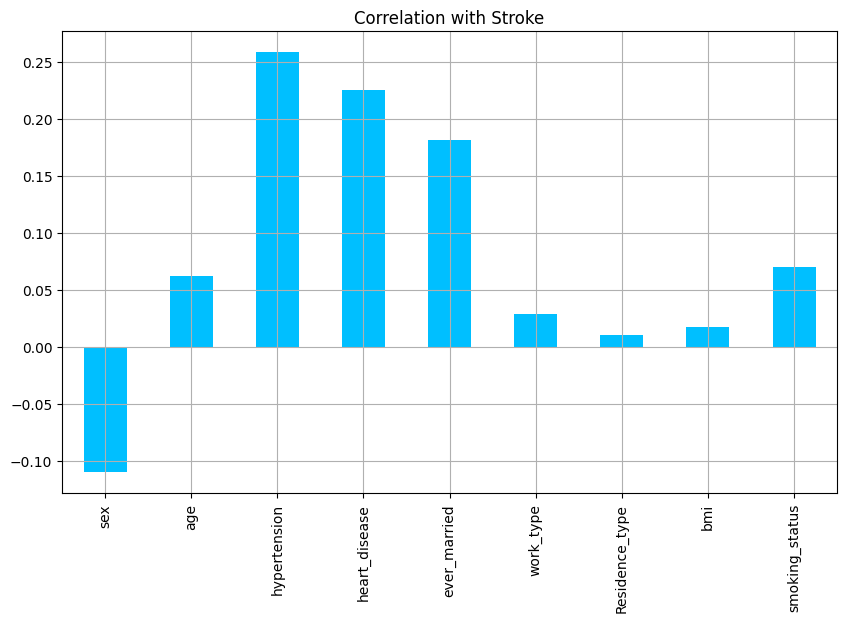

In [14]:
data.drop('stroke', axis=1).corrwith(data.stroke).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Stroke",color="deepskyblue");

The features "bmi", "Residence_type", "work_type" are least correlated with Storke.
All other features have a significant correlation with Stroke.

###**2.4 Correlation between any two features**

<Axes: >

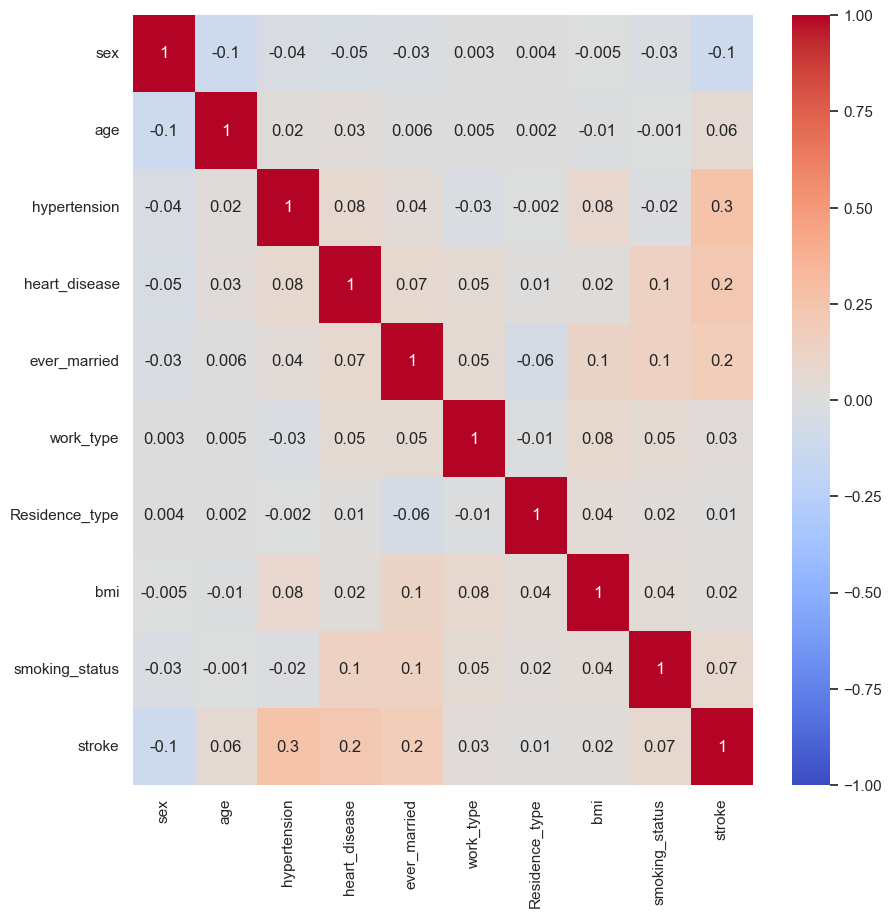

In [15]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(data.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')

There is no correlation higher than +- 0.3 for a pair of features. Therefore, I cannot drop features at this time.

###**2.5 Stroke frequency by categorical and numeric features**

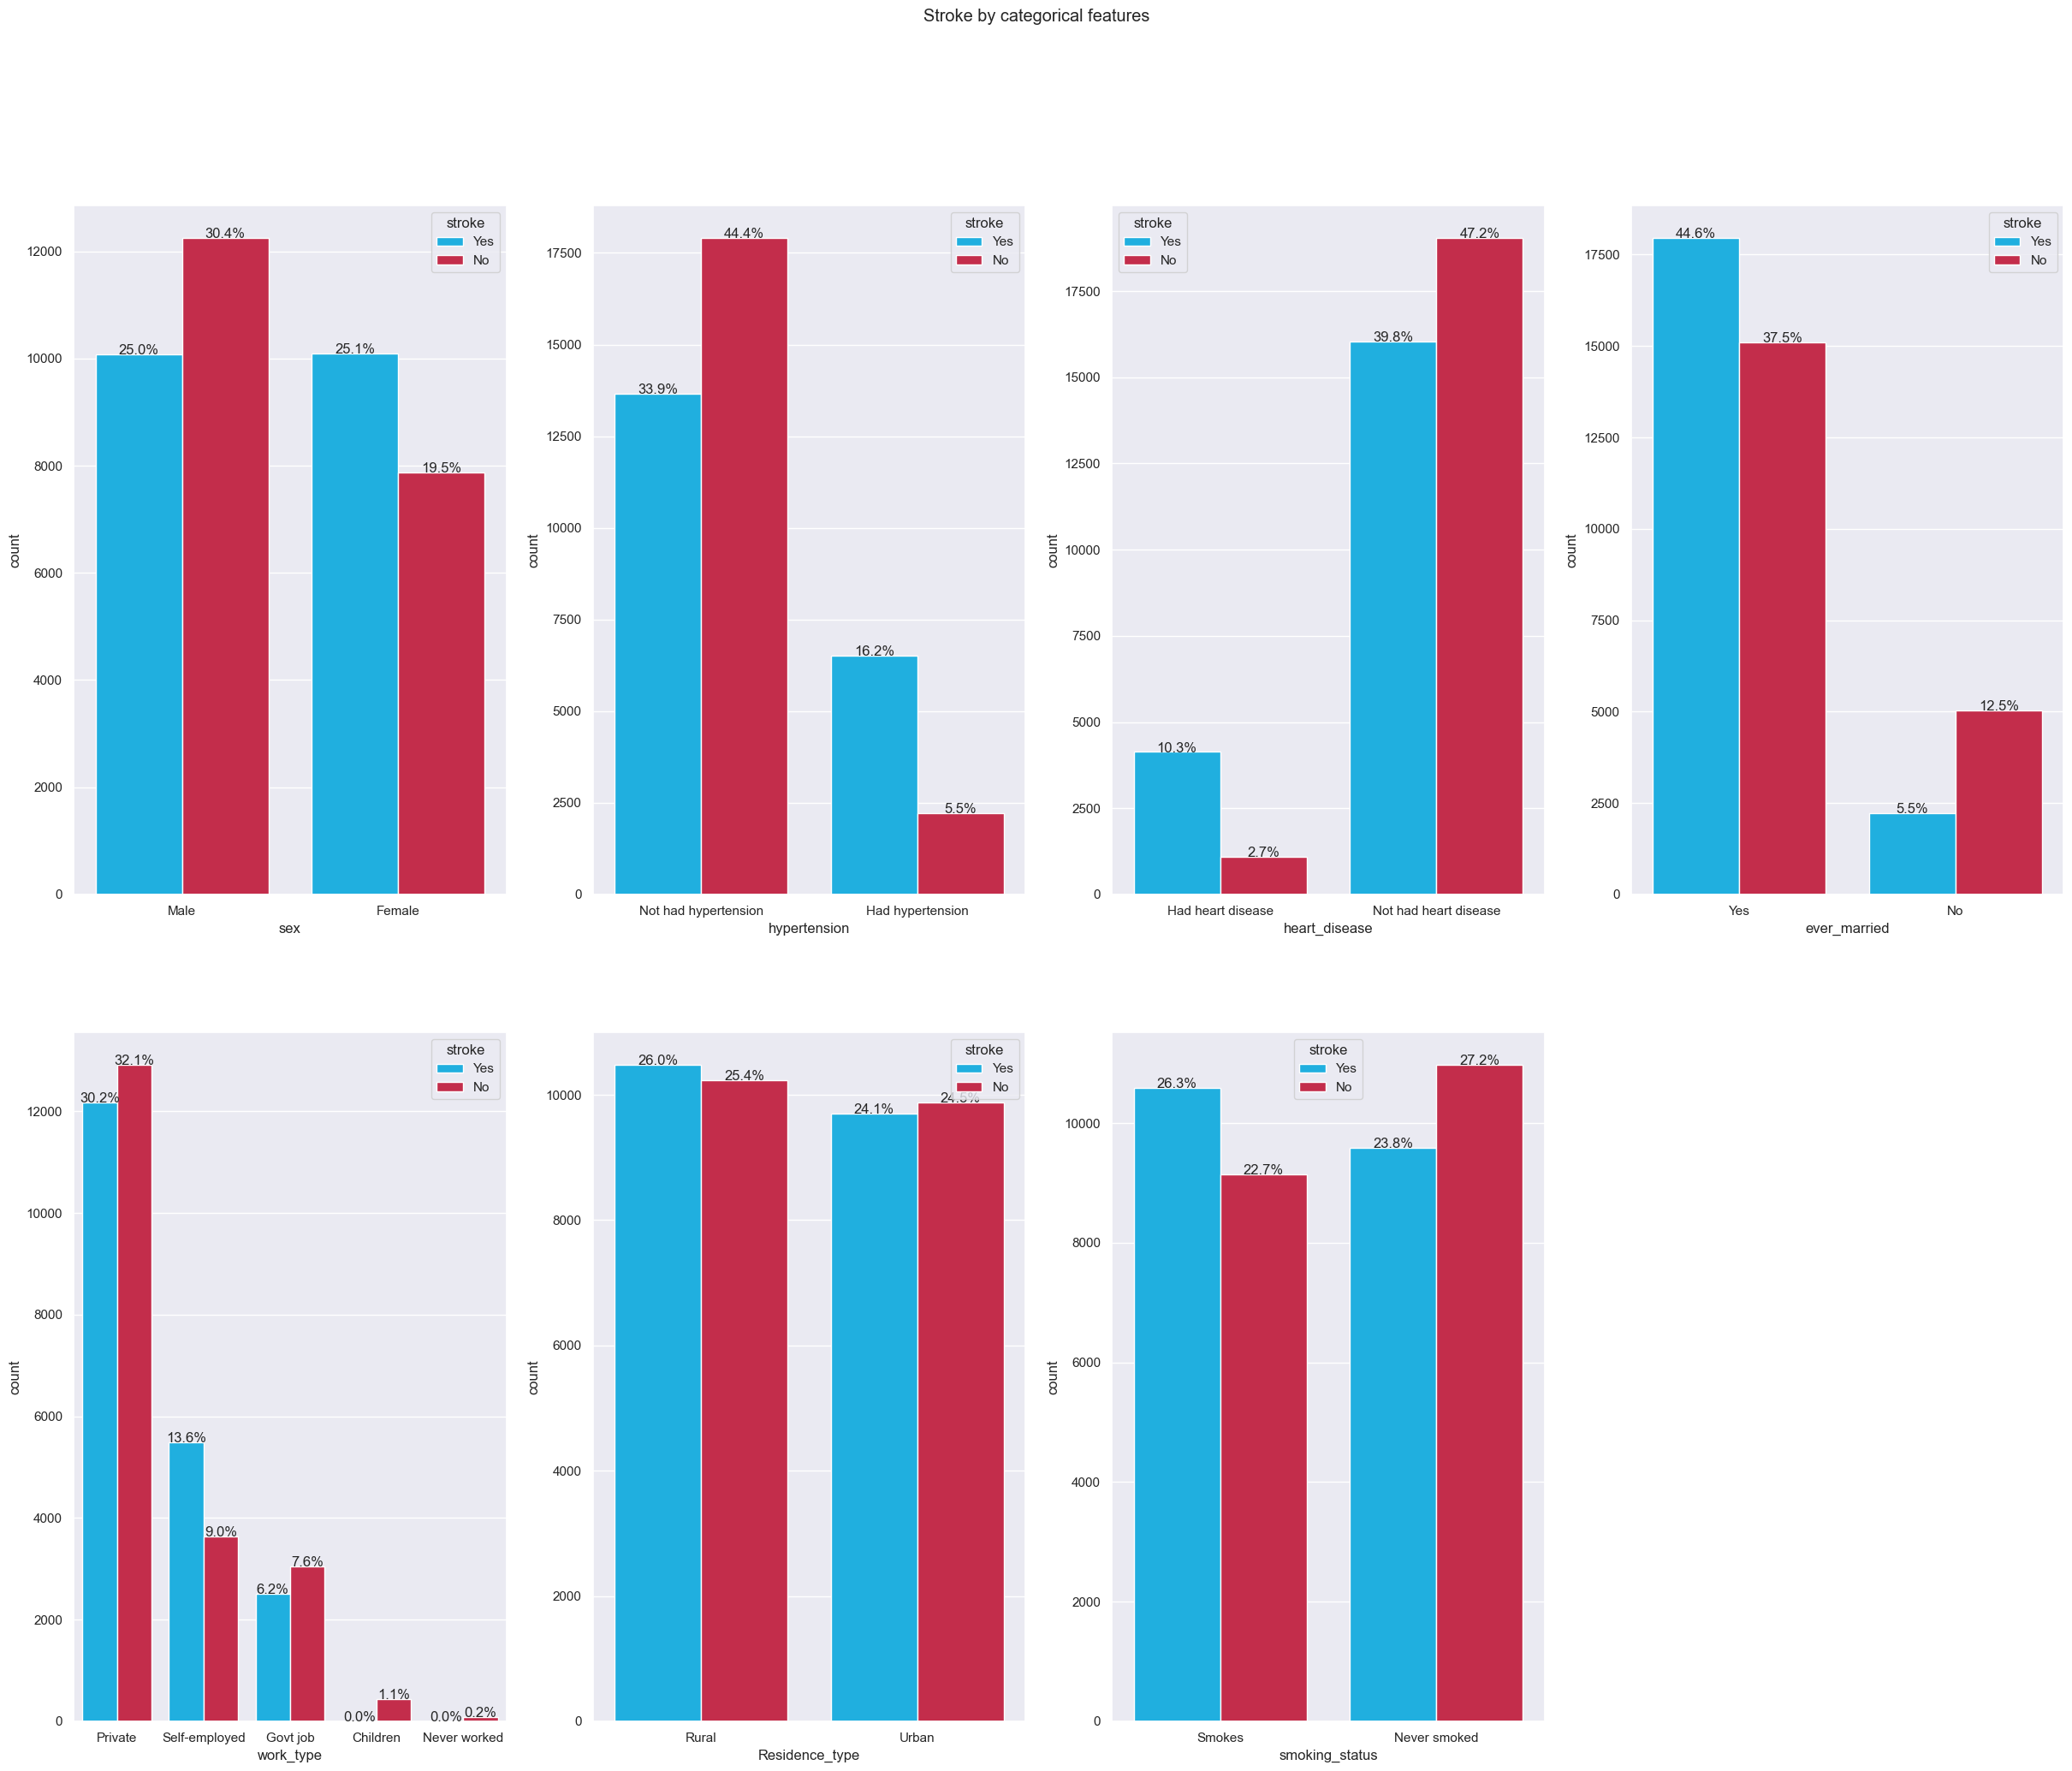

In [16]:
features = [x for x in data_vis.columns if x not in ['stroke','bmi','age']]
plt.figure(figsize=(30,23))
plt.suptitle('Stroke by categorical features')

# Subplots
for index, feature in enumerate(features):
    plt.subplot(2, 4, index + 1)
    ax = sns.countplot(x=feature, hue='stroke', data=data_vis, palette=['deepskyblue', 'crimson'])
    plt.xlabel(feature)

    # Annotating the percentages
    total_count = len(data_vis)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.01, '{:.1f}%'.format((height / total_count) * 100),
                ha="center")
        
plt.show()



*   Gender has no effect on stroke.

*   Smoking, hypertension and heart disease increase the risk of stroke.
*   People whose type of work is "self employee" have a higher risk of stroke than other types of work.
* There is no clear connection between residence type and stroke, but there is a slight tendency to stroke in a rural residence type.

In [17]:
#scale the data before pairplot
data_pairplot = data.copy()
float_columns = [x for x in data.columns if x in ['bmi','age']]

sc = StandardScaler()
data_pairplot[float_columns] = sc.fit_transform(data_pairplot[float_columns])
data_pairplot.head(4)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke
0,1.0,0.537138,0,1,1,4,1,0.897911,1,1
1,1.0,-0.436021,0,1,1,4,0,0.300614,0,1
2,0.0,0.444456,0,0,1,4,1,0.577410,1,1
3,1.0,-0.482361,1,0,1,3,0,-0.937684,0,1


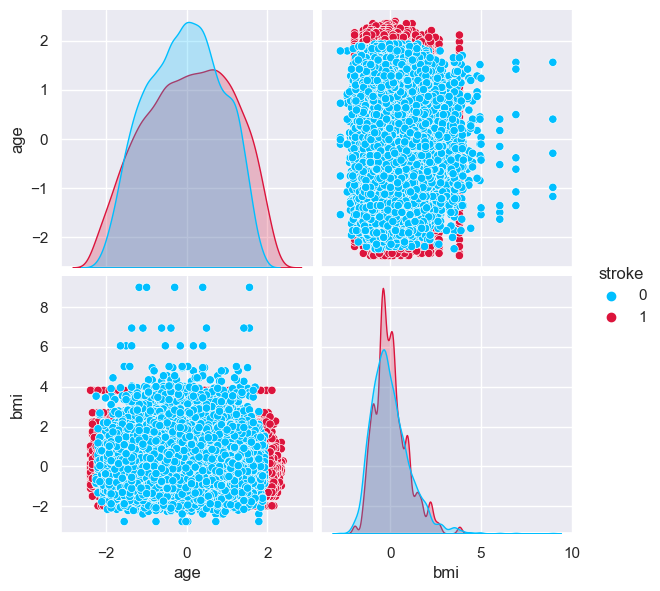

In [18]:
float_columns = [x for x in data_pairplot.columns if x in ['bmi','age']]
sns.set_context('notebook')
sns.pairplot(data_pairplot[float_columns + ['stroke']], 
             hue='stroke', 
             hue_order=[0,1],
             height=3,
             palette={0:'deepskyblue',1:'crimson'});

Combining of float features does not seem to explain stroke.

###**2.6 The effect of combining categorical features on stroke**

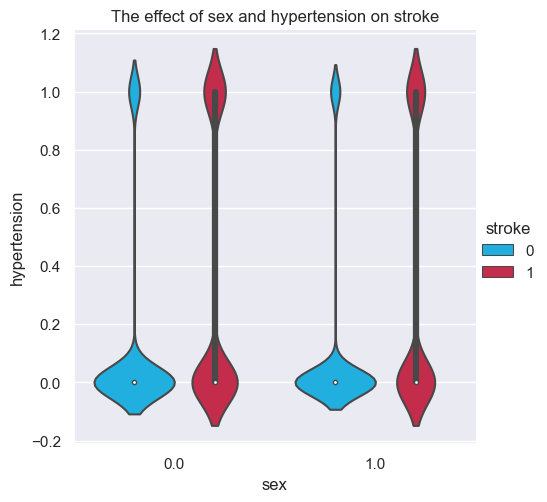

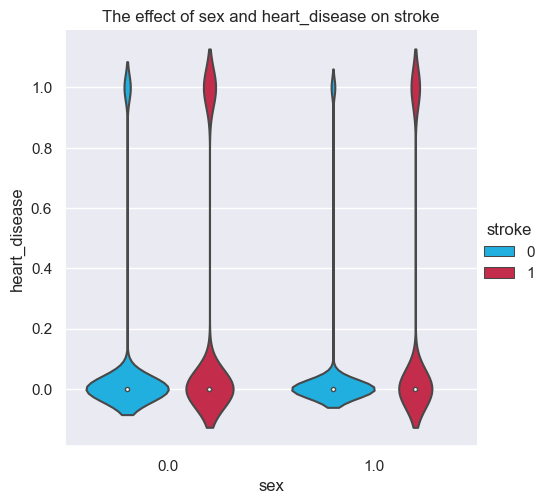

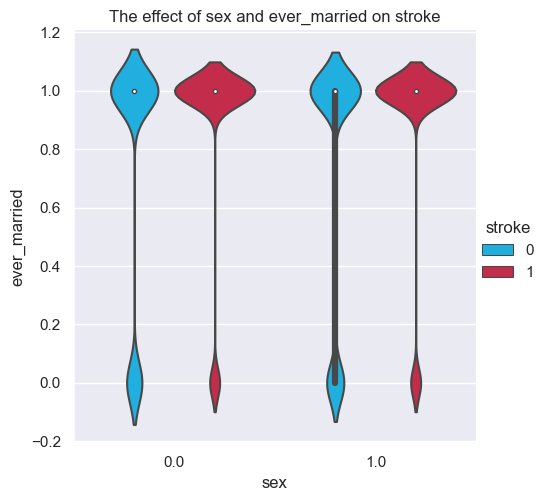

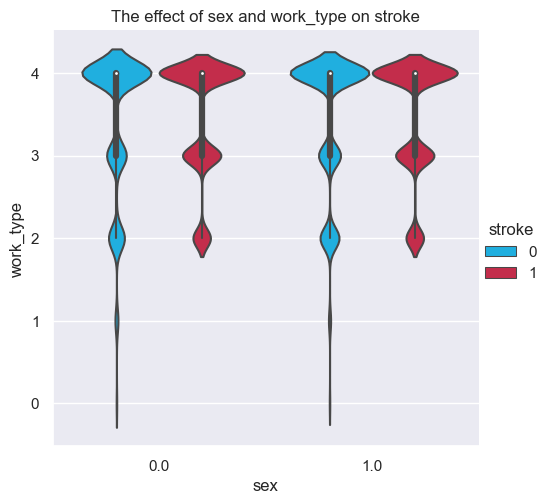

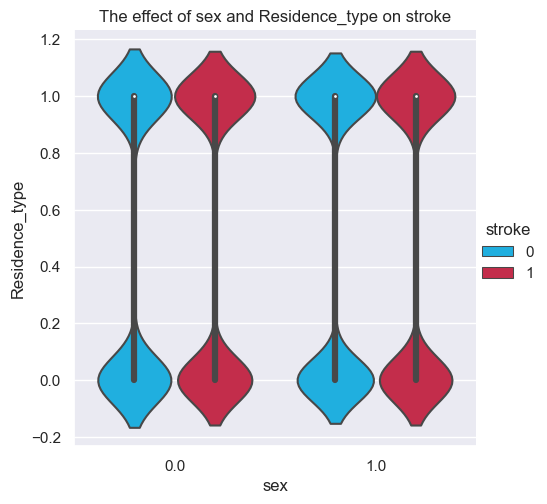

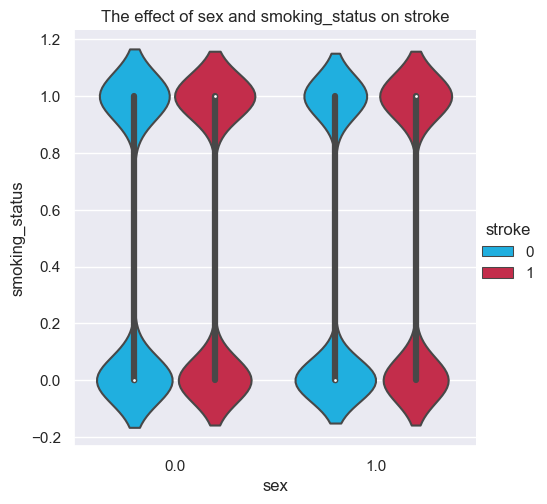

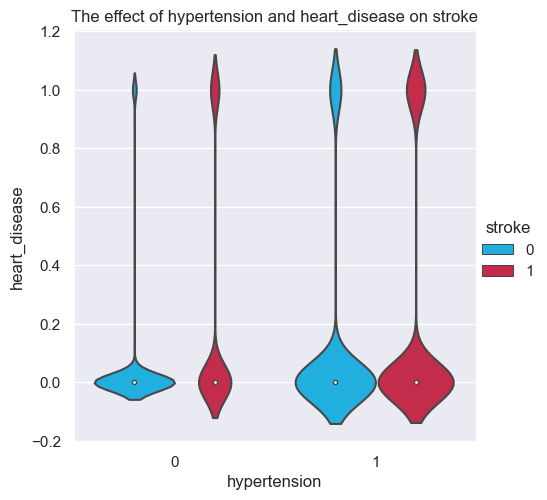

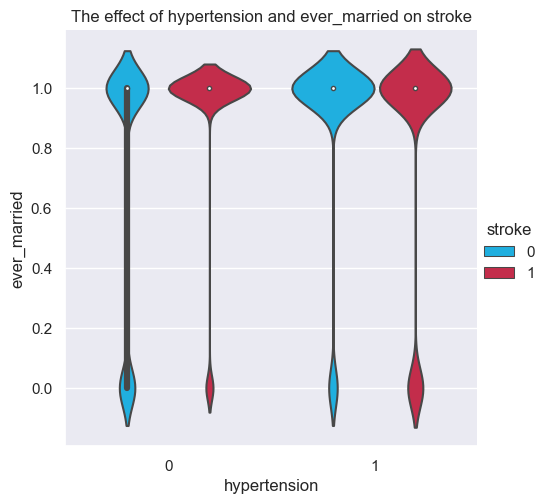

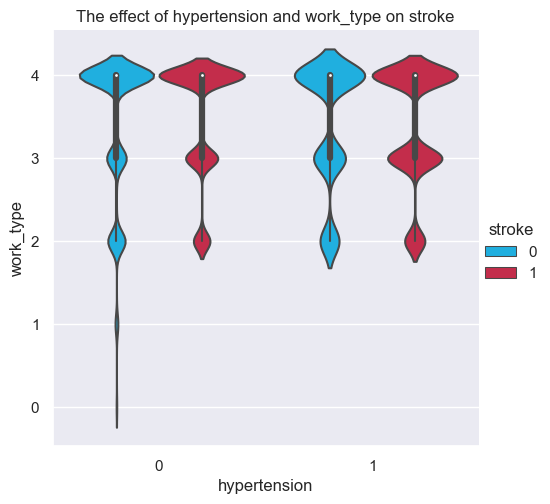

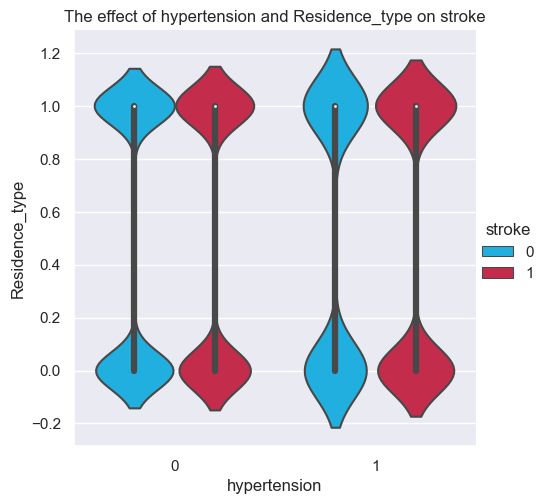

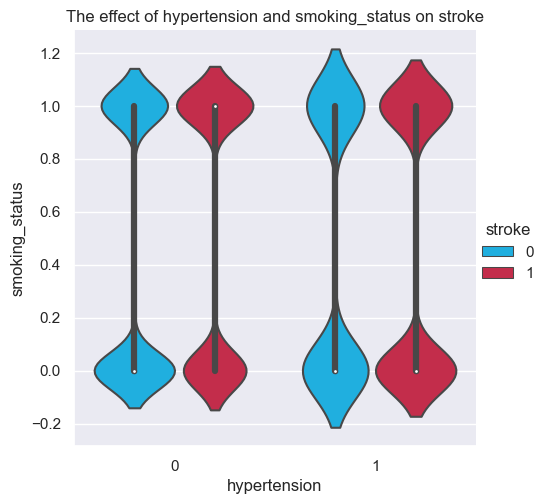

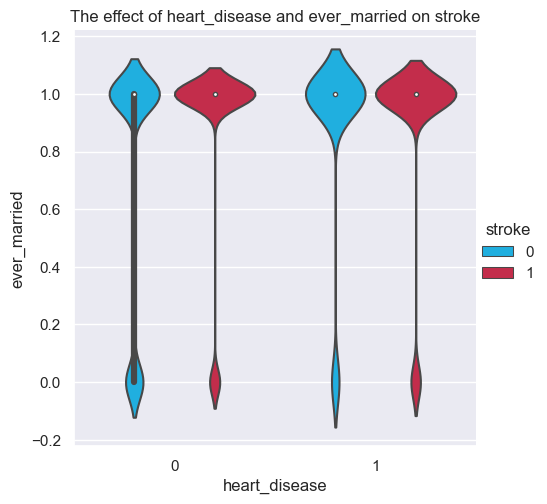

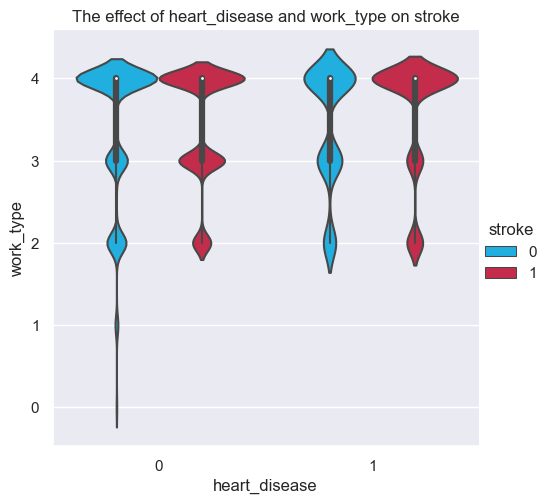

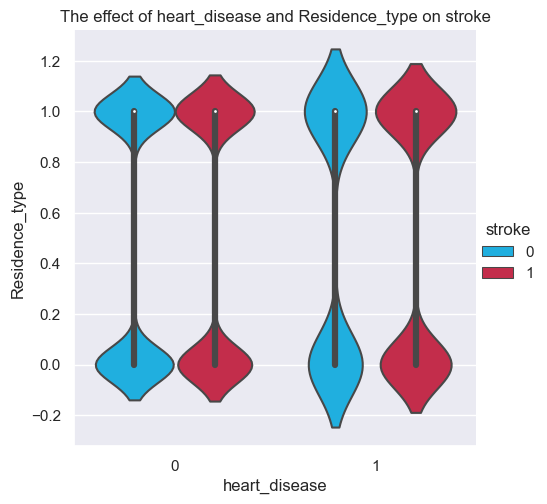

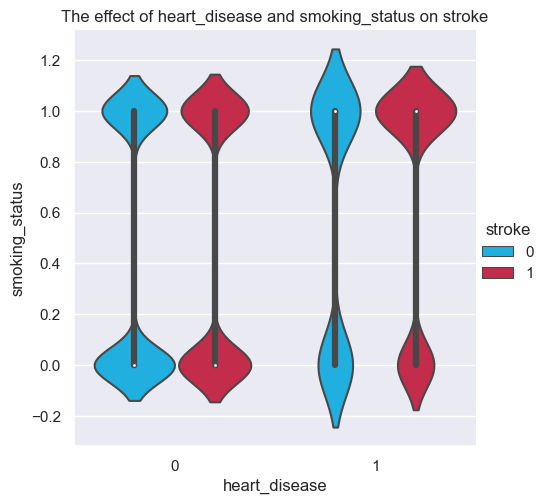

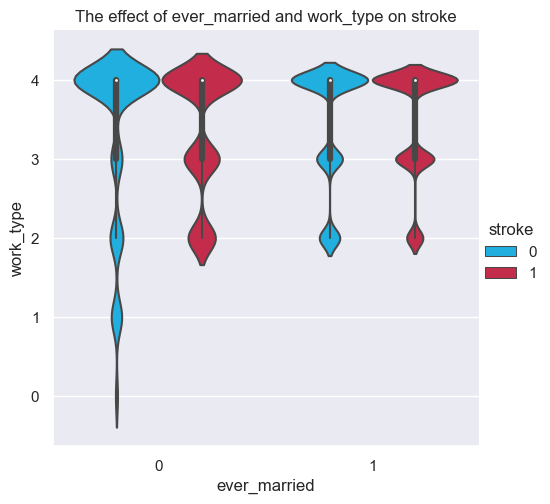

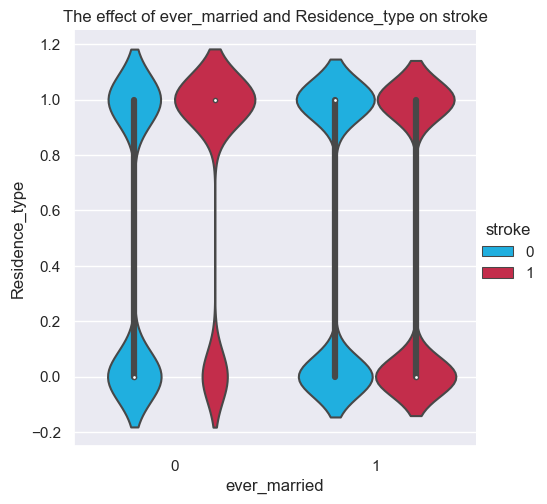

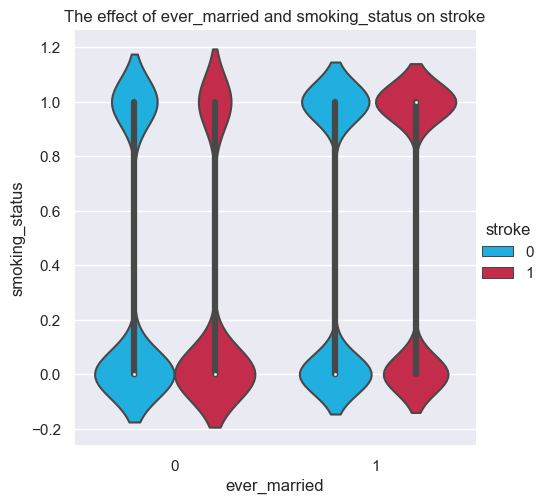

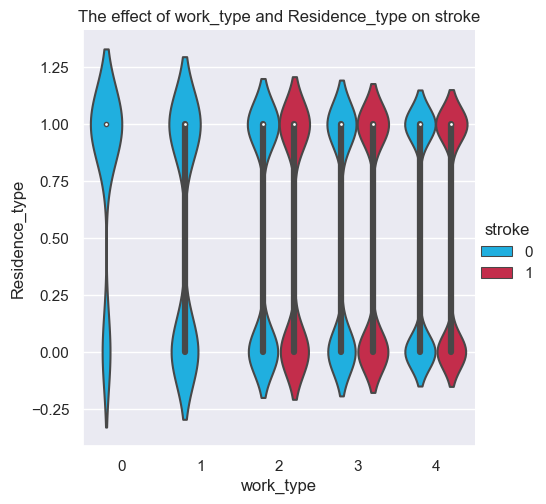

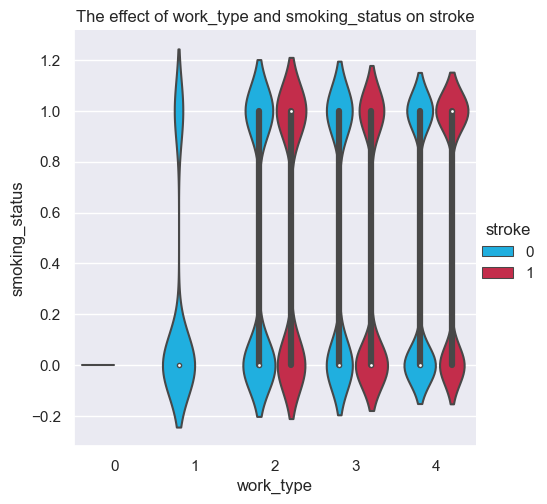

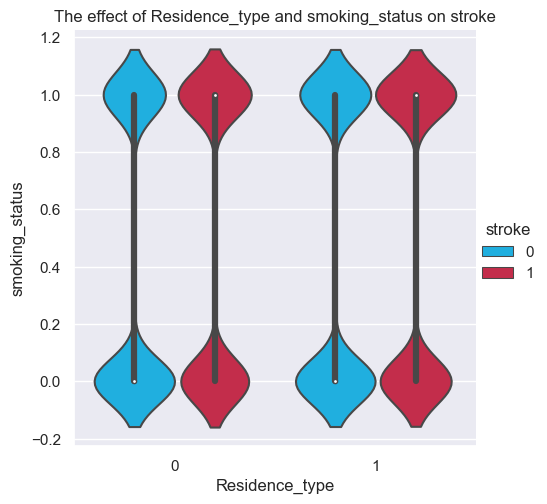

In [20]:
for i in range (len(features)):
    for x in range (len(features)-i-1):
        sns.catplot(data=data, x=features[i], y=features[i+x+1], hue="stroke", kind="violin",palette = ['deepskyblue','crimson']).set(title="The effect of "+features[i] + " and "+features[i+x+1]+" on stroke")


*   Acording to these graphs, heart disease and smoking both togather increase the risk of stroke.

*   Acording to these graphs, married life and smoking both togather increase the risk of stroke.



###**2.7 Numeric features distributions**

**Bmi**

<Figure size 1200x500 with 0 Axes>

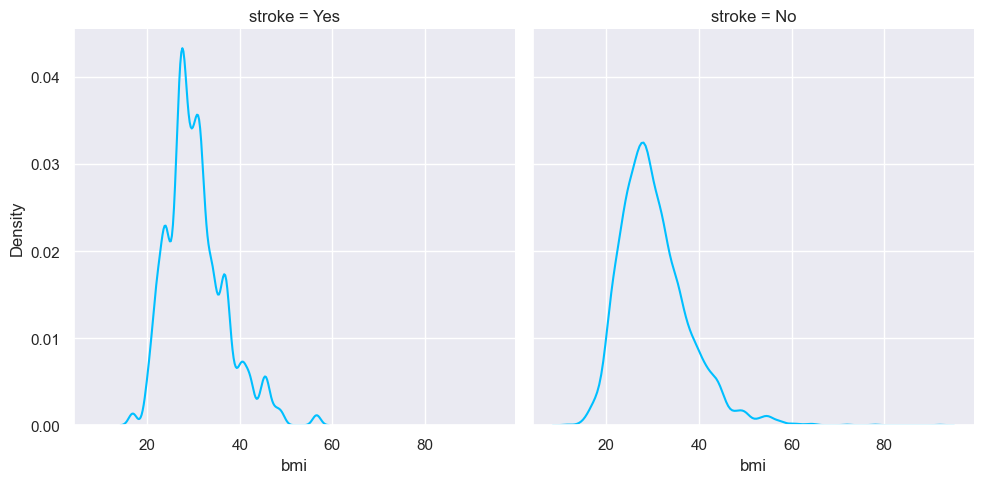

In [21]:
plt.figure(figsize=(12,5))
sns.displot(x='bmi', col='stroke' , data = data_vis, kind="kde" ,color = 'deepskyblue');

Binning the data to see the distribution clearly

In [22]:
bmi = pd.cut( data_vis['bmi'],bins=[0,18.5,25,30,35,max(data_vis['bmi'])],labels=['Underweight','Normal','Overweight','Obesity','Extremly Obesity'])
bmi_temp = pd.crosstab(data_vis['stroke'],bmi,rownames=['Stroke'])
bmi_temp = bmi_temp.astype(float)
bmi_temp

bmi,Underweight,Normal,Overweight,Obesity,Extremly Obesity
Stroke,,,,,
No,321.0,4526.0,6299.0,4539.0,4428.0
Yes,118.0,3689.0,7134.0,5059.0,4170.0


In [23]:
bmi_temp_sum_lst=list(bmi_temp.transpose().sum().values)
for idx in range(bmi_temp.values.shape[0]):
    bmi_temp.values[idx]= bmi_temp.values[idx]/bmi_temp_sum_lst[idx]*100

bmi_temp

bmi,Underweight,Normal,Overweight,Obesity,Extremly Obesity
Stroke,,,,,
No,1.595983,22.502859,31.318053,22.567494,22.015612
Yes,0.585027,18.289539,35.369360,25.081805,20.674269


<Figure size 1200x2000 with 0 Axes>

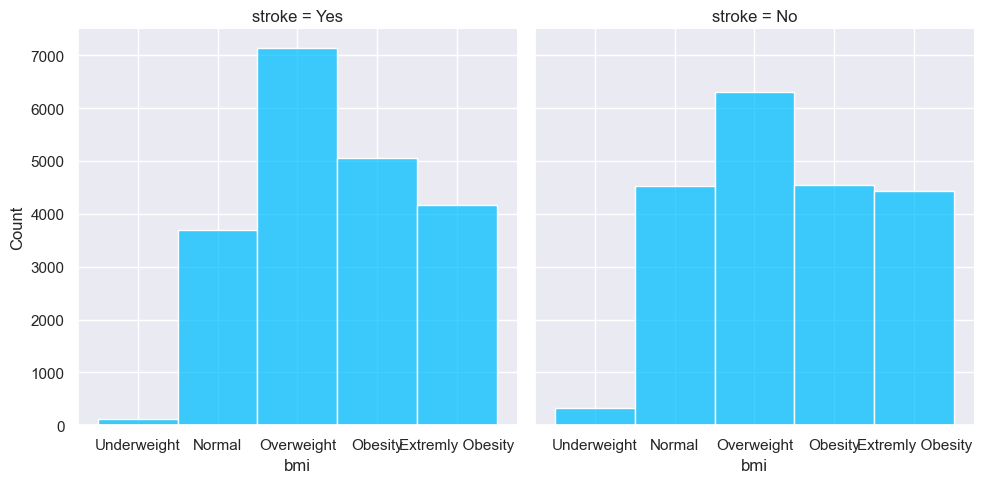

In [24]:
plt.figure(figsize=(12,20))
sns.displot(data=data_vis,col='stroke',x=bmi,color='deepskyblue');

The bmi's distribution of target column values are similar.

**Age**

<Figure size 1200x500 with 0 Axes>

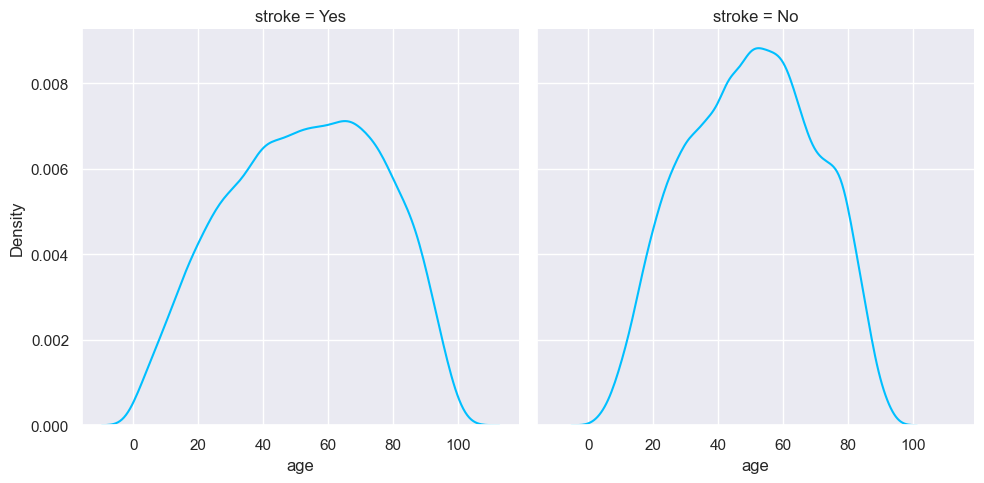

In [25]:
plt.figure(figsize=(12,5))
sns.displot(x='age', col='stroke' , data = data_vis, kind="kde" ,color = 'deepskyblue');

Binning the data to see the distribution clearly

In [26]:
age = pd.cut( data_vis['age'],bins=[0,30,45,55,70,max(data_vis['age'])],labels=['0-30','30-45','45-55','55-70','70+'])
age_temp = pd.crosstab(data_vis['stroke'],age,rownames=['Stroke'])
age_temp = age_temp.astype(float)
age_temp

age,0-30,30-45,45-55,55-70,70+
Stroke,,,,,
No,3831.0,4506.0,3484.0,4696.0,3596.0
Yes,4055.0,3761.0,2765.0,4269.0,5297.0


In [27]:
age_temp_sum_lst=list(age_temp.transpose().sum().values)
for idx in range(age_temp.values.shape[0]):
    age_temp.values[idx]= age_temp.values[idx]/age_temp_sum_lst[idx]*100

age_temp

age,0-30,30-45,45-55,55-70,70+
Stroke,,,,,
No,19.047382,22.403421,17.322130,23.348083,17.878984
Yes,20.127066,18.667792,13.724128,21.189259,26.291756


<Figure size 1000x600 with 0 Axes>

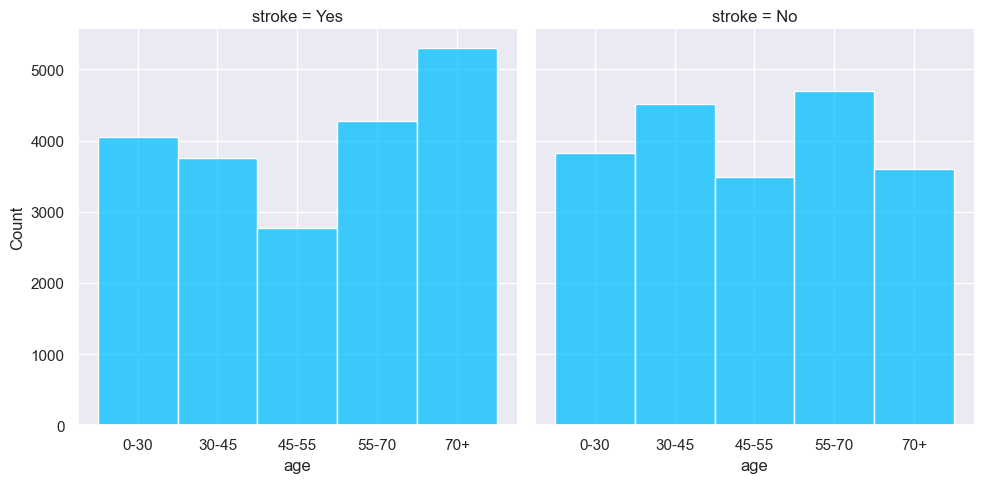

In [28]:
plt.figure(figsize=(10,6))
sns.displot(data=data_vis,col='stroke',x=age,color='deepskyblue');

The age's distribution of target column values are similar.

###**2.8 Distribution of numeric Features by stroke and medical features**

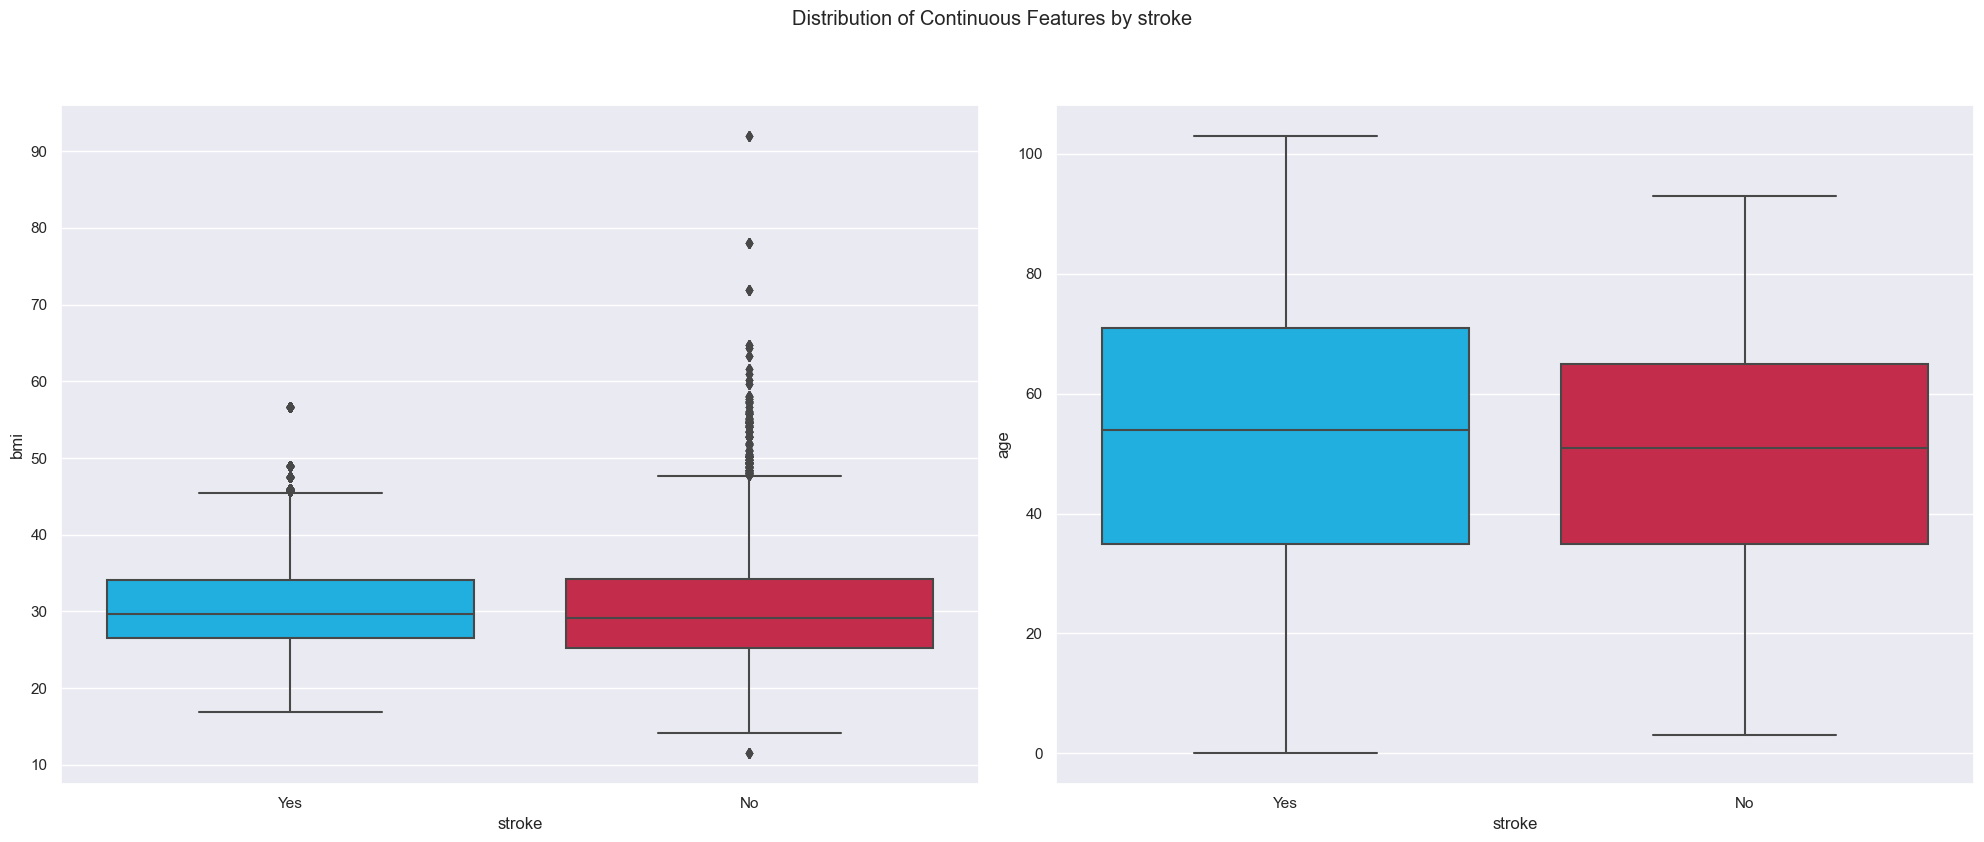

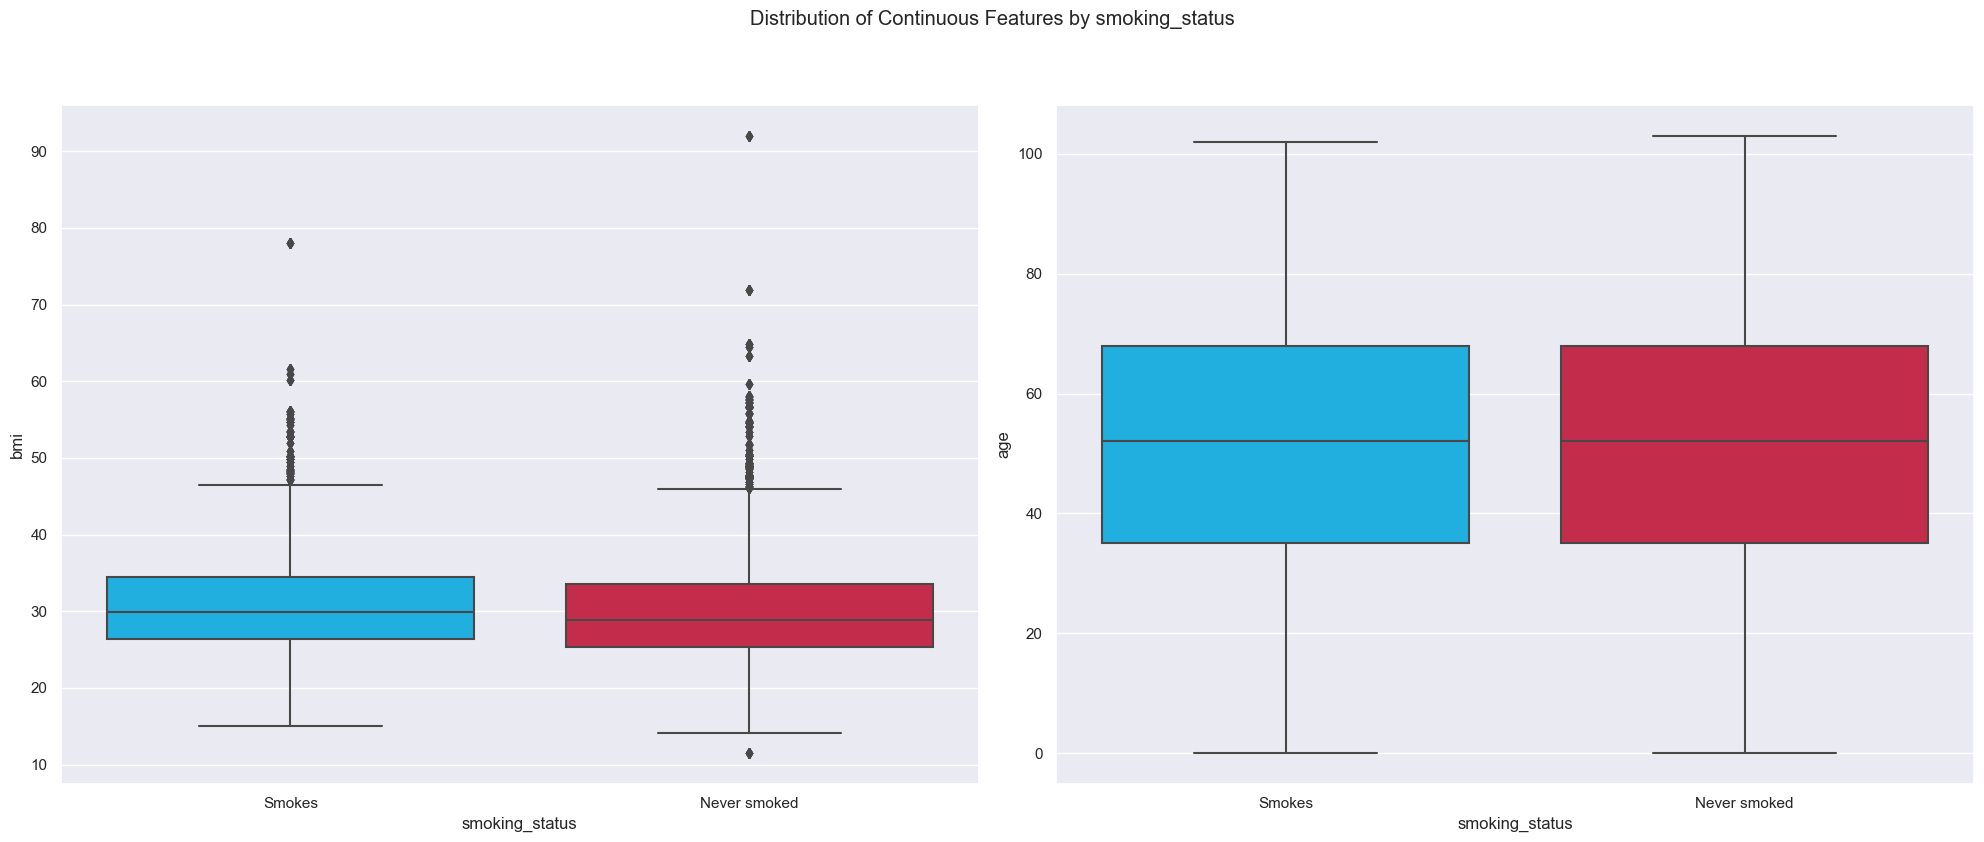

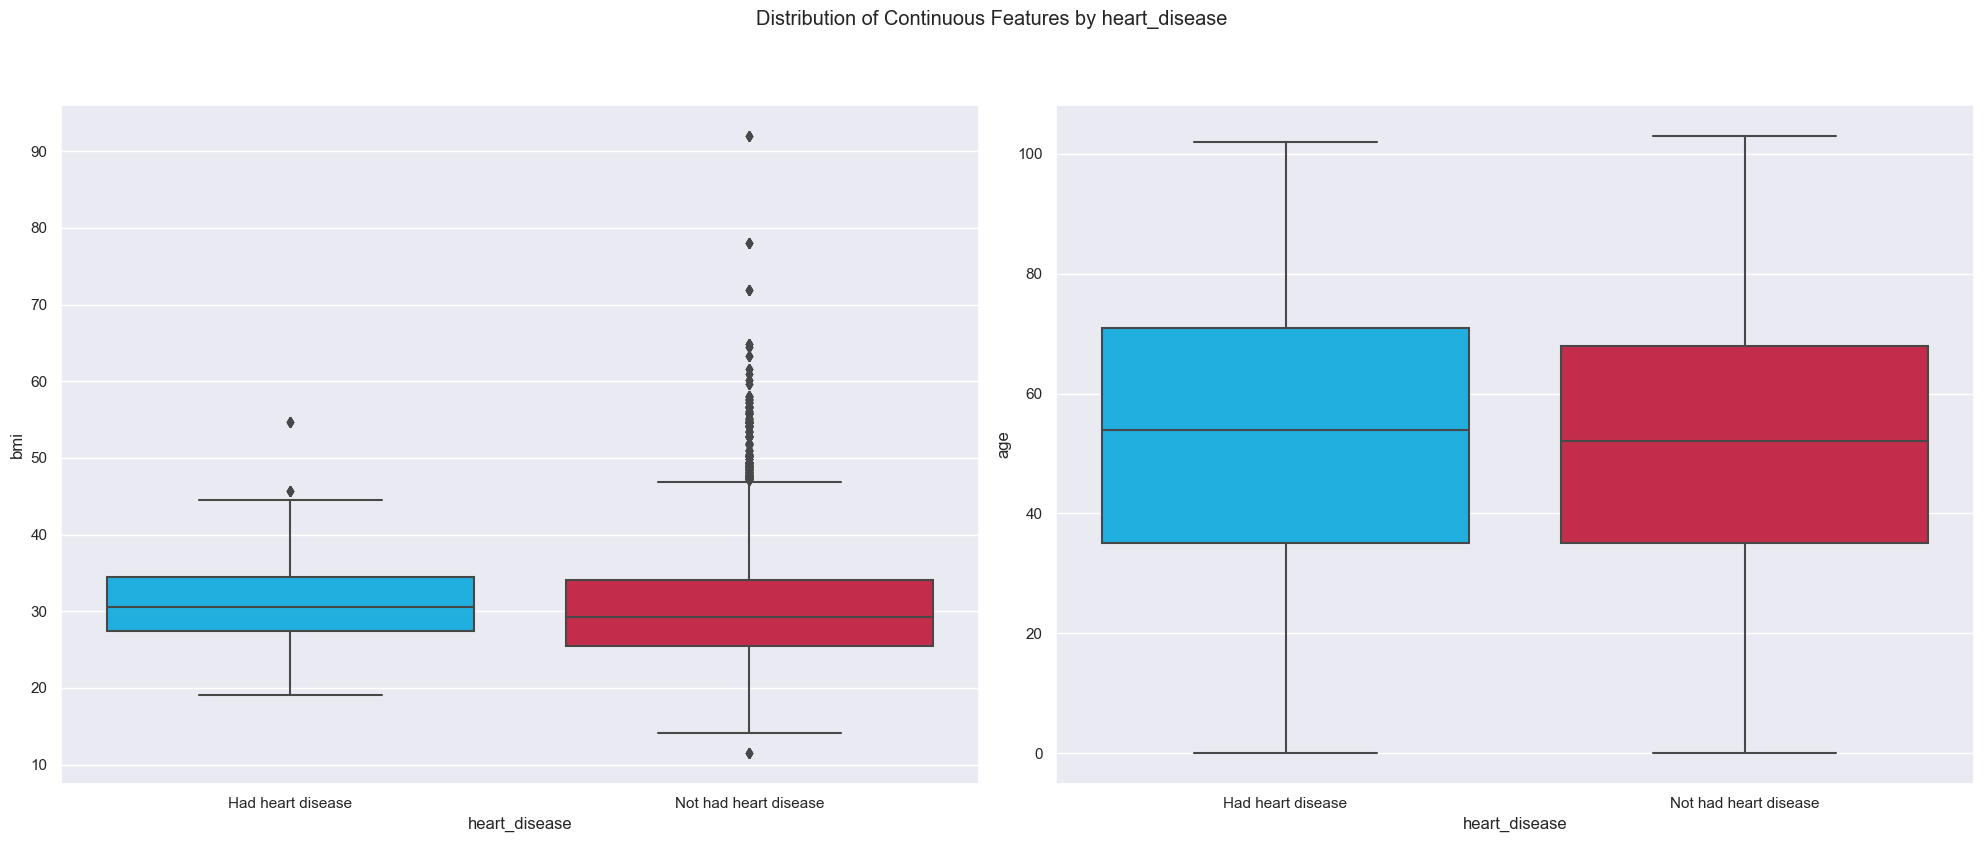

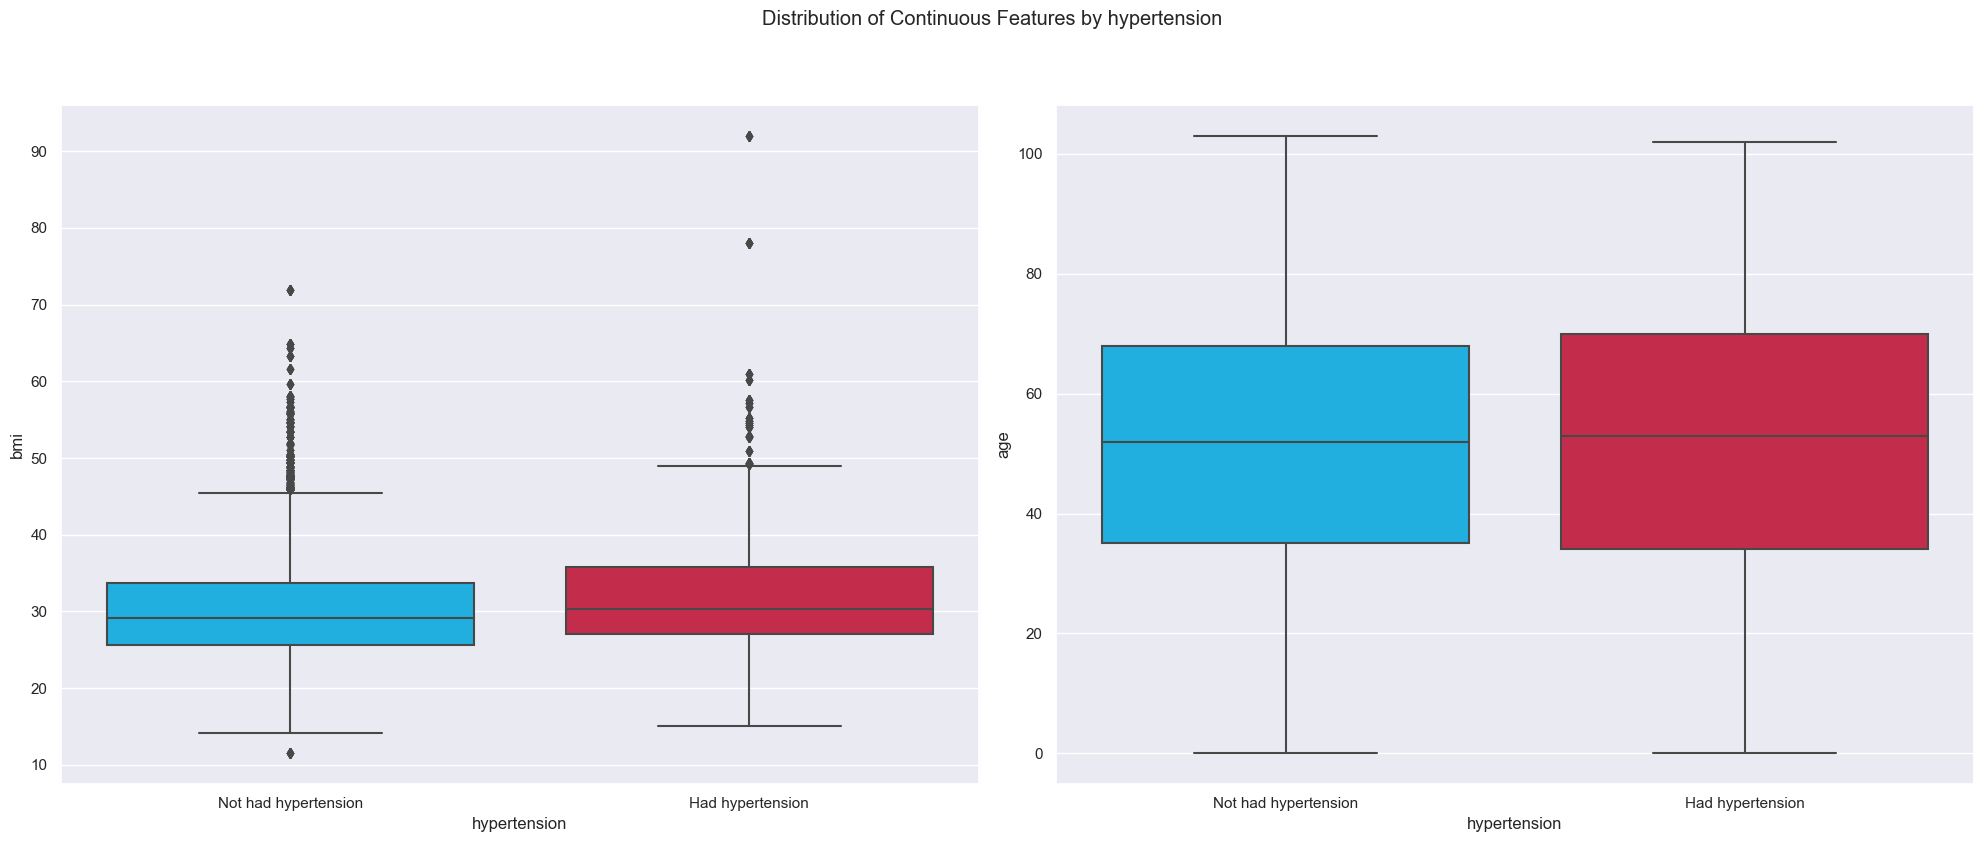

In [29]:
features = ['stroke','smoking_status','heart_disease','hypertension']
for i in enumerate(features):
  box_cols = ['bmi', 'age']
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
  fig.suptitle('Distribution of Continuous Features by '+i[1], y = 1.05);
  for col, ax in zip(box_cols, axes.ravel()):
      sns.boxplot(data=data_vis, x=i[1], y=col ,palette = ['deepskyblue','crimson'], ax=ax)
  plt.tight_layout()

The median, range and values in the "avg_glucose_level" feature is higher when there is a stroke / hypertension / heart_disease.

#**3. Data Preparation 1 - *Without* Features Selection**

In [30]:
#Loading the data If not run EDA
data = pd.read_csv(r'..Stroke\stroke_data.csv')
data["sex"].fillna(0, inplace = True) #fill 0 instead NA in the gender column
data = data.drop(data[data.age < 0].index) #drop rows with negative age
data = data.drop(columns = ['avg_glucose_level']) 

###**3.1 Values with low frequency**

Let's look at the "work_type" feature graph:

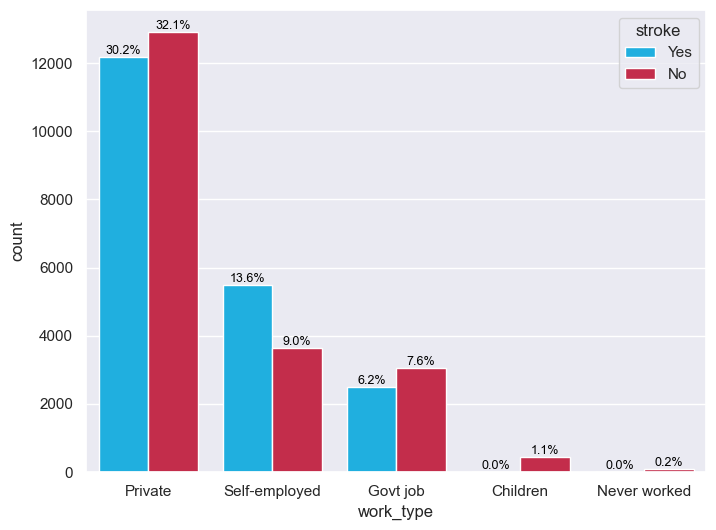

In [31]:
plt.figure(figsize=(8, 6))
x = sns.countplot(x="work_type", hue='stroke', data=data_vis, palette=['deepskyblue', 'crimson'])
for z in x.patches:
    height = z.get_height()
    x.annotate('{:.1f}%'.format((height / len(data_vis)) * 100), (z.get_x() + z.get_width() / 2., height),
                ha="center", va="bottom", fontsize=9, color='black')

plt.show()


Only 1.3 percent of the data are divided into the values "children", "never worked". In addition, neither of these two values had a stroke. This data can cause biases, so I will drop these records.

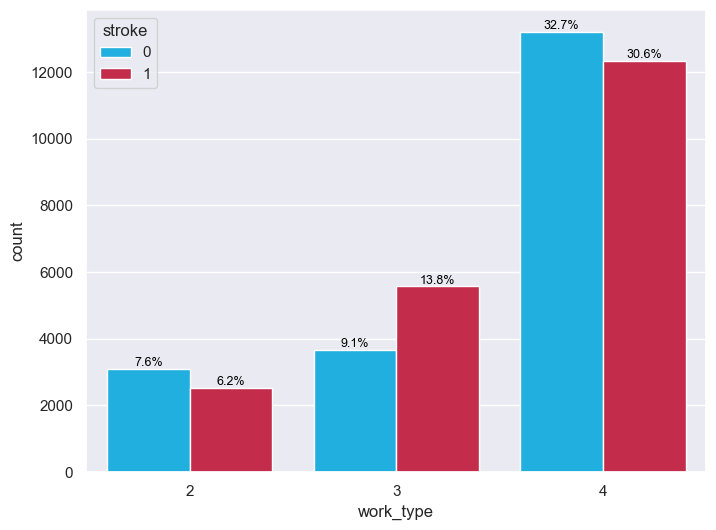

In [32]:
# Drop rows where work_type is equal to 1
data.drop(data[data['work_type'] <= 1].index, inplace=True)

# Plot countplot
plt.figure(figsize=(8,6))
x = sns.countplot(x="work_type", hue='stroke', data=data, palette=['deepskyblue', 'crimson'])
for z in x.patches:
    height = z.get_height()
    x.annotate('{:.1f}%'.format((height / len(data)) * 100), (z.get_x() + z.get_width() / 2., height),
                ha="center", va="bottom", fontsize=9, color='black')

plt.show()


The "work_type" feature is of the Nominal Variable type. Therefore One Hot Encoder must be activated here.

In [33]:
data.work_type[data['work_type'] == 2] = 'Govt job'
data.work_type[data['work_type'] == 3] = 'Self-employed'
data.work_type[data['work_type'] == 4] = 'Private'
one_hot_encode_cols = ['work_type']  # filtering by string categoricals
# Encode these columns as categoricals so one hot encoding works on split data (if desired)
for col in one_hot_encode_cols:
    data[col] = pd.Categorical(data[col])
# Do the one hot encoding
data = pd.get_dummies(data, columns=one_hot_encode_cols)
data.head()

,sex,age,hypertension,heart_disease,ever_married,Residence_type,bmi,smoking_status,stroke,work_type_Govt job,work_type_Private,work_type_Self-employed
0,1.0,63.0,0,1,1,1,36.6,1,1,False,True,False
1,1.0,42.0,0,1,1,0,32.5,0,1,False,True,False
2,0.0,61.0,0,0,1,1,34.4,1,1,False,True,False
3,1.0,41.0,1,0,1,0,24.0,0,1,False,False,True
4,1.0,85.0,0,0,1,1,29.0,1,1,False,True,False


###**3.2 Skewness Checking**

In [34]:
data_skew = data[['age','bmi']]
skew = pd.DataFrame(data_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
age,-0.067617,False
bmi,1.100130,True


There are 1 columns with high Skewness.
Therefore, we will normalize them using the QuantileTransformer method.

In [35]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
data[['bmi']] = qt.fit_transform(data[['bmi']])

In [36]:
data_skew = data[['age','bmi']]
skew = pd.DataFrame(data_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
age,-0.067617,False
bmi,-0.052492,False


Now, the columns are not skewed.

###**3.3 Data Scaling**

The StandardScaler method was chosen because the shape of the distribution of these features.

In [37]:
sc = StandardScaler()
data[['bmi']] = sc.fit_transform(data[['bmi']])
data[['age']] = sc.fit_transform(data[['age']])
data.head()

,sex,age,hypertension,heart_disease,ever_married,Residence_type,bmi,smoking_status,stroke,work_type_Govt job,work_type_Private,work_type_Self-employed
0,1.0,0.537125,0,1,1,1,0.973839,1,1,False,True,False
1,1.0,-0.436881,0,1,1,0,0.491474,0,1,False,True,False
2,0.0,0.444362,0,0,1,1,0.714759,1,1,False,True,False
3,1.0,-0.483263,1,0,1,0,-1.001959,0,1,False,False,True
4,1.0,1.557512,0,0,1,1,-0.058936,1,1,False,True,False


###**3.4 Data Splitting**

The classes are balanced so there is no reason use StratifiedShuffleSplit

In [39]:
y = (data['stroke']).astype(int)
X = data.loc[:, data.columns != 'stroke']  # everything except "stroke"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
X

,sex,age,hypertension,heart_disease,ever_married,Residence_type,bmi,smoking_status,work_type_Govt job,work_type_Private,work_type_Self-employed
0,1.0,0.537125,0,1,1,1,0.973839,1,False,True,False
1,1.0,-0.436881,0,1,1,0,0.491474,0,False,True,False
2,0.0,0.444362,0,0,1,1,0.714759,1,False,True,False
3,1.0,-0.483263,1,0,1,0,-1.001959,0,False,False,True
4,1.0,1.557512,0,0,1,1,-0.058936,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
40905,1.0,-0.622406,0,0,0,1,0.046258,1,False,True,False
40906,0.0,0.073312,0,0,1,0,1.403668,0,False,True,False
40907,1.0,-0.900694,0,0,1,0,0.584359,0,True,False,False
40908,1.0,-0.436881,0,0,1,0,0.740980,0,False,False,True


In [41]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

stroke
1    0.506531
0    0.493469
Name: proportion, dtype: float64
stroke
1    0.50432
0    0.49568
Name: proportion, dtype: float64


#**4. ML - Models 1**

###**4.1 K Nearest Neighbors**

Search for the best model parameters with GridSearchCV.

In [42]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19],  #odd numbers because there are 2 classes in target coulmn
              'weights': ['distance', 'uniform']}  
gridKNN = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gridKNN.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.814 total time=   0.0s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.804 total time=   0.0s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.809 total time=   0.0s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.813 total time=   0.0s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.800 total time=   0.0s
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.814 total time=   0.2s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.804 total time=   0.2s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.809 total time=   0.2s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.813 total time=   0.2s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.800 total time=   0.2s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.803 total time=   0.1s
[CV 2/5] END ...n_neighbors=3, weights=distance

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['distance', 'uniform']},
             verbose=3)

Get the best parameters.

In [43]:
print(gridKNN.best_params_)

{'n_neighbors': 1, 'weights': 'distance'}


1NN is the best parameter for prediction. There will probably be an overfitting here.


Prediction according to this model.

In [44]:
y_pred_test = gridKNN.predict(X_test)
y_pred_train = gridKNN.predict(X_train)

Overfitting checking:

In [45]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9915633672525439
0.8227781534069567


As expected, there is high overfitting. At the same time, the accuracy is also high in Test.

The model metrics:

**The model predicts strokes with a high accuracy of 99.2%.**

In [46]:
#function that get y_test and calculate into df all the relevant metric
def train_evaluate_model(y_test):
    #fit the model instance 
    predictions = y_pred_test # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    auc = roc_auc_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, auc]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy', 'auc'])
    return eval_df

In [47]:
results = train_evaluate_model(y_test)
results.index = ['K Nearest Neighbors - Method 1']
results.style.background_gradient(cmap = sns.color_palette("blend:green,red", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.822778,0.831223,0.799697,0.865336,0.822407,0.822407


**The most important metric is Recall (in this business problem):
Recall = Of all real positive cases, how many are predicted positive.
The recall in this model - 98.5%.**

Confusion Matrix

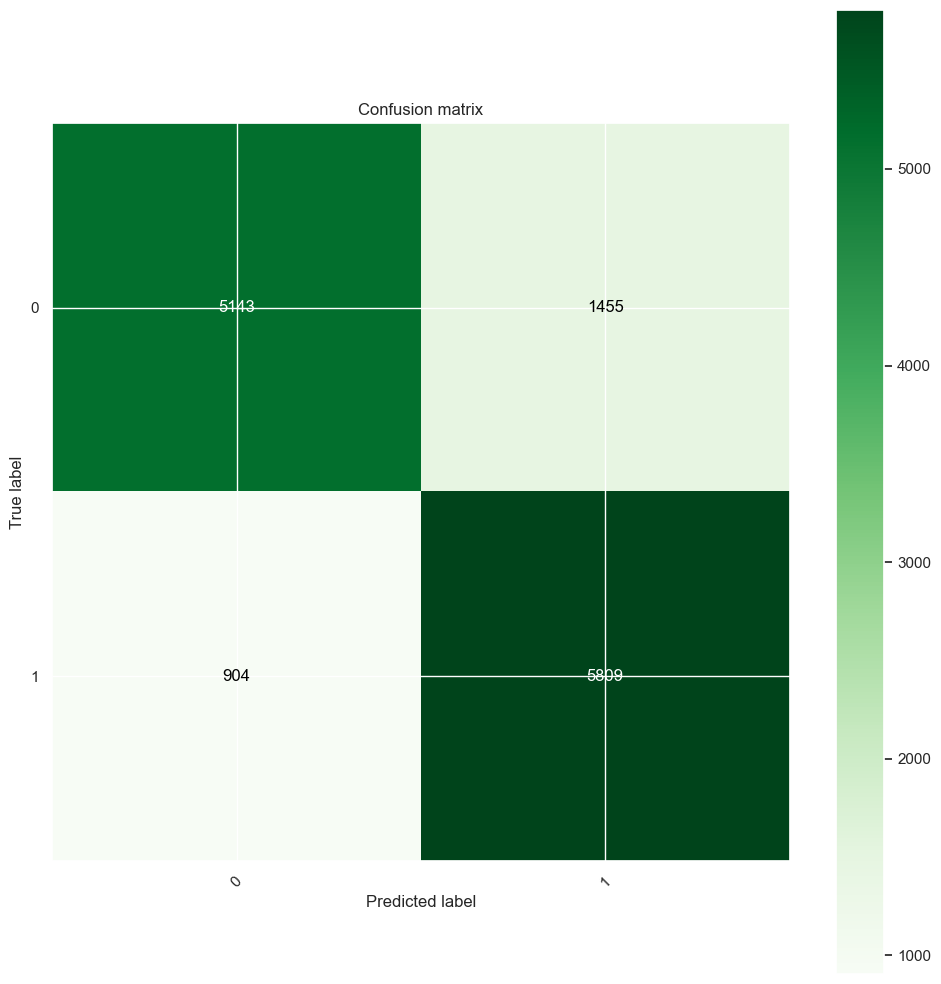

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming gridKNN is your GridSearchCV object
best_estimator = gridKNN.best_estimator_

# Get predictions on test data
y_pred = best_estimator.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


###**4.2 Logistic Regression**

Building a simple logistic regression model.

In [49]:
LG = LogisticRegression().fit(X_train, y_train)
#prediction
y_pred_test = LG.predict(X_test)
y_pred_train = LG.predict(X_train)
#scores
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.660536540240518
0.6577266922094508


Low score. Building a model with regularization.

In [50]:
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

with tf.device(device_name):

  # defining parameter range
  param_grid = {'penalty':['l1','l2'],
                'Cs': [2,5,10,20], 
                'cv': [4],
                'solver': ['liblinear','saga']}  
  gridLG = GridSearchCV(LogisticRegressionCV(), param_grid, refit = True, verbose = 3)
    
  # fitting the model for grid search
  gridLG.fit(X_train, y_train)

No GPU, using /device:CPU:0.
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.664 total time=   0.1s
[CV 2/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.653 total time=   0.1s
[CV 3/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.665 total time=   0.1s
[CV 4/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.654 total time=   0.1s
[CV 5/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.666 total time=   0.1s
[CV 1/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.664 total time=   0.3s
[CV 2/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.653 total time=   0.3s
[CV 3/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.665 total time=   0.3s
[CV 4/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.654 total time=   0.3s
[CV 5/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.666 total time=   0.3s
[CV 1/5] END Cs=2, cv=4, penalty=l2, solver=liblinear;, score=0.6

Get the best parameters.

In [51]:
print(gridLG.best_params_)

{'Cs': 5, 'cv': 4, 'penalty': 'l1', 'solver': 'liblinear'}


Prediction according to this model.

In [52]:
y_pred_test = gridLG.predict(X_test)
y_pred_train = gridLG.predict(X_train)

Overfitting checking:

In [53]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.6649028677150787
0.66336112989257


There is no overfitting, but the model results are poor.

**The model predicts strokes with a low accuracy of 66.4%.**

The model metrics:

In [54]:
resultsLG = train_evaluate_model(y_test)
resultsLG.index = ['Logistic Regression - Method 1']
results = pd.concat([results, resultsLG])

In [55]:
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.822778,0.831223,0.799697,0.865336,0.822407,0.822407
Logistic Regression - Method 1,0.663361,0.627669,0.709696,0.562640,0.664239,0.664239


Confusion Matrix

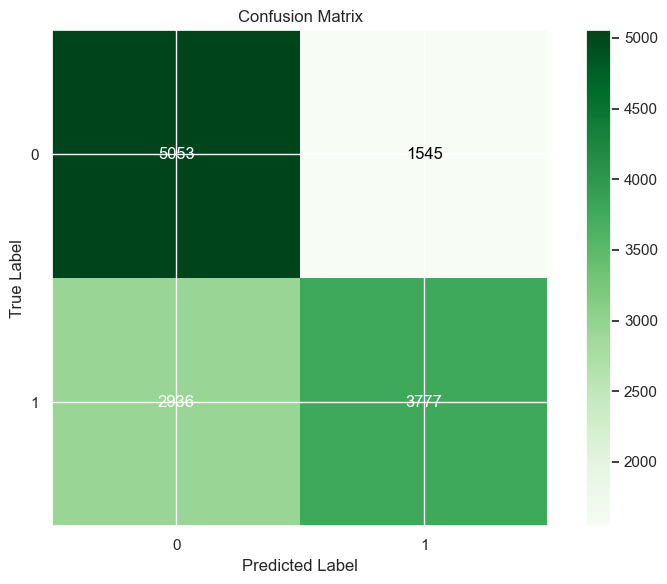

In [56]:
# Get the best estimator from the grid search
best_estimator = gridLG.best_estimator_

# Predict the labels on the test set
y_pred = best_estimator.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

###**4.3 Naive Bayes**

I will test the algorithm with the two methods that fit the data: Gaussian and Bernoulli.

In [57]:
cv_N = 10
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB()
      }
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X_train, y_train, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.6491027596882921, 'bernoulli': 0.6502493049228686}

The effectiveness of the methods is similar. The prediction results are not good.

In [58]:
# fitting the model
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

Prediction according to this model.

In [59]:
y_pred_test = GNB.predict(X_test)
y_pred_train = GNB.predict(X_train)

In [60]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.6496577243293247
0.6505146119750582


There is no overfitting, but the model results are poor.

The model metrics:

**The model predicts strokes with a low accuracy of 65%.**

In [62]:
resultsNB = train_evaluate_model(y_test)
resultsNB.index = ['Naive Bayes - Method 1']
results = pd.concat([results, resultsNB])

In [63]:
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.822778,0.831223,0.799697,0.865336,0.822407,0.822407
Logistic Regression - Method 1,0.663361,0.627669,0.709696,0.562640,0.664239,0.664239
Naive Bayes - Method 1,0.650515,0.600824,0.708561,0.521525,0.651639,0.651639


Confusion Matrix

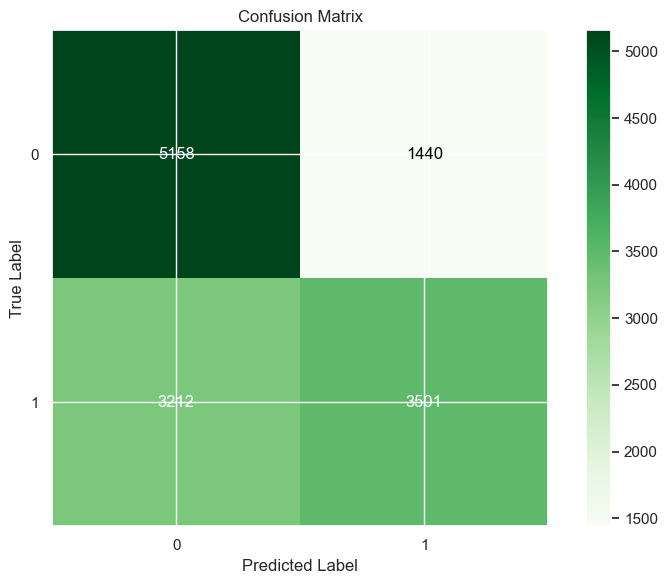

In [64]:
# Get the best estimator from the grid search
best_estimator = GNB

# Predict the labels on the test set
y_pred = best_estimator.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


###**4.4 Support Vector Machine**

Search for the best model parameters with GridSearchCV.

In [65]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

with tf.device(device_name):
  param_grid = {'C': [1,10,100,1000], 
                'gamma': [1, 0.1, 0.01, 0.001],
                'kernel': ['rbf']} 
    
  gridSVM = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=2)
    
  # fitting the model for grid search
  gridSVM.fit(X_train, y_train)

No GPU, using /device:CPU:0.
Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.746 total time=  16.5s
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.748 total time=  16.7s
[CV 1/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.689 total time=  16.8s
[CV 2/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.688 total time=  17.2s
[CV 1/2] END .......C=1, gamma=0.01, kernel=rbf;, score=0.651 total time=  18.9s
[CV 2/2] END .......C=1, gamma=0.01, kernel=rbf;, score=0.652 total time=  18.9s
[CV 1/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.654 total time=  20.8s
[CV 2/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.659 total time=  20.7s
[CV 1/2] END .........C=10, gamma=1, kernel=rbf;, score=0.762 total time=  17.2s
[CV 2/2] END .........C=10, gamma=1, kernel=rbf;, score=0.764 total time=  16.3s
[CV 1/2] END .......C=10, gamma=0.1, kernel=rbf;, score=0.709 total time=  17.4s
[CV 2/2] END ......

Get the best parameters.

In [66]:
print(gridSVM.best_params_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


Prediction according to this model.

In [67]:
y_pred_test = gridSVM.predict(X_test)
y_pred_train = gridSVM.predict(X_train)

Overfitting checking:

In [68]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.8602775208140611
0.8251821801517542


There is low overfitting, but the model results are good.

**The model predicts strokes with a high accuracy of 86%.**

Model metrics:

In [69]:
resultsSVM = train_evaluate_model(y_test)
resultsSVM.index = ['Support Vector Machine - Method 1']
results = pd.concat([results, resultsSVM])

In [70]:
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.822778,0.831223,0.799697,0.865336,0.822407,0.822407
Logistic Regression - Method 1,0.663361,0.627669,0.709696,0.562640,0.664239,0.664239
Naive Bayes - Method 1,0.650515,0.600824,0.708561,0.521525,0.651639,0.651639
Support Vector Machine - Method 1,0.825182,0.834671,0.797881,0.875019,0.824748,0.824748


Confusion Matrix

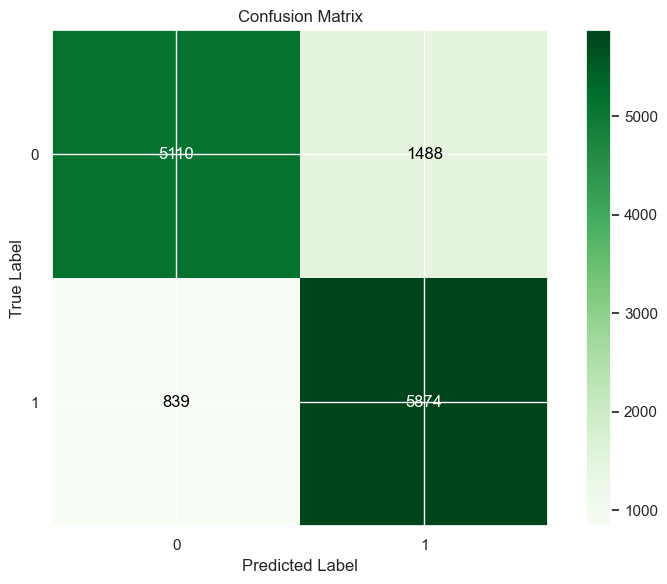

In [71]:
# Get the best estimator from the grid search
best_estimator = gridSVM.best_estimator_

# Predict the labels on the test set
y_pred = best_estimator.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

###**4.5 Decision Tree**

Building a model without restrictions.

In [72]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

Building a model with restrictions - Search for the best model parameters with GridSearchCV.

In [73]:
#dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

# defining parameter range
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}  
gridDT = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, n_jobs=-1)
  
# fitting the model for grid search
gridDT.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 40, 2),
                         'max_features': range(1, 12)})

Get the best parameters.

In [74]:
print(gridDT.best_params_)

{'max_depth': 39, 'max_features': 10}


Prediction according to this model.

In [75]:
y_pred_test = gridDT.predict(X_test)
y_pred_train = gridDT.predict(X_train)

Overfitting Checking:

In [76]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9917853839037928
0.9518443392682744


There is low overfitting, the model results are excellent.

**The model predicts strokes with a high accuracy of 99.2%.**

Model metrics:

In [77]:
resultsDT = train_evaluate_model(y_test)
resultsDT.index = ['Decision Trees - Method 1']
results = pd.concat([results, resultsDT])

Confusion Matrix

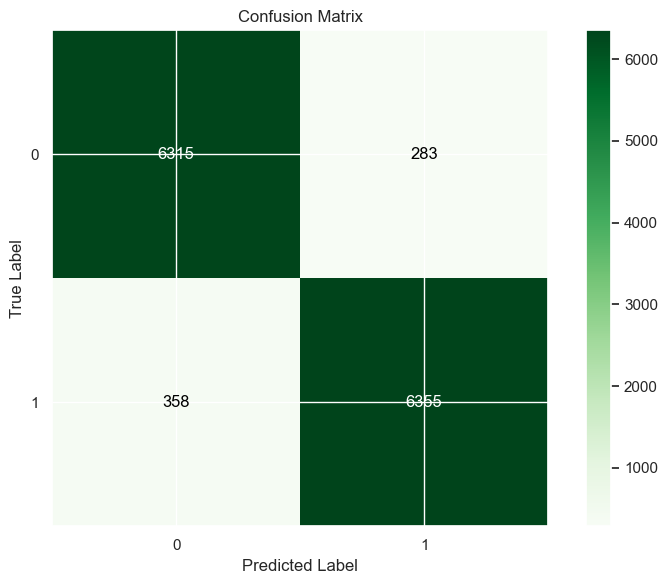

In [78]:
best_estimator = gridDT.best_estimator_

# Predict the labels on the test set
y_pred = best_estimator.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

###**4.6 Random Forest**

Search for the best model parameters with GridSearchCV.

In [79]:
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

# defining parameter range
param_grid = {'n_estimators':[15, 20, 30, 40, 50, 100, 150, 200, 300, 400]
              }  
gridRF = GridSearchCV(RF, param_grid)
  
# fitting the model for grid search
gridRF.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42,
                                              warm_start=True),
             param_grid={'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200,
                                          300, 400]})

Get the best parameters.

In [80]:
print(gridRF.best_params_)

{'n_estimators': 200}


Prediction according to this model.

In [81]:
y_pred_test = gridRF.predict(X_test)
y_pred_train = gridRF.predict(X_train)

Overfitting Checking:

In [82]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9917853839037928
0.9381714371572384


There is low overfitting, the model results are excellent.

**The model predicts strokes with a high accuracy of 99.2%.**

**The most important metric - RECALL - is good. less stroke patient will be missed.**

Model metrics:

In [83]:
resultsRF = train_evaluate_model(y_test)
resultsRF.index = ['Random Forest - Method 1']
results = pd.concat([results, resultsRF])
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.822778,0.831223,0.799697,0.865336,0.822407,0.822407
Logistic Regression - Method 1,0.663361,0.627669,0.709696,0.562640,0.664239,0.664239
Naive Bayes - Method 1,0.650515,0.600824,0.708561,0.521525,0.651639,0.651639
Support Vector Machine - Method 1,0.825182,0.834671,0.797881,0.875019,0.824748,0.824748
Decision Trees - Method 1,0.951844,0.951989,0.957367,0.946671,0.951889,0.951889
Random Forest - Method 1,0.938171,0.939923,0.921557,0.959035,0.937990,0.937990


Confusion Matrix

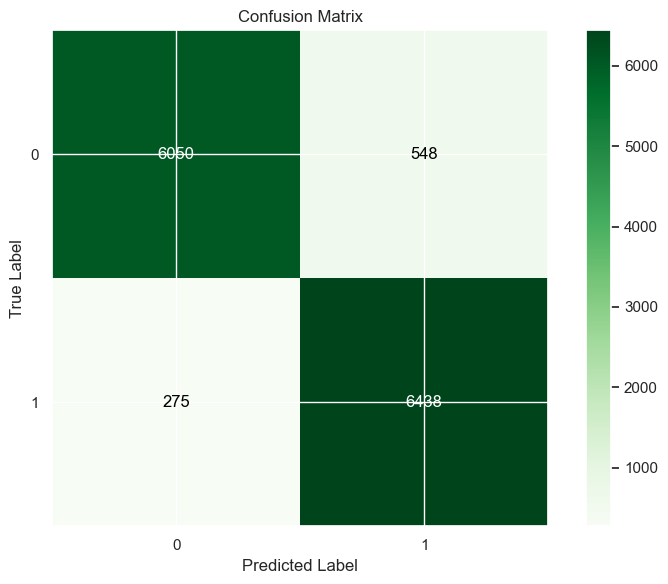

In [84]:
# Get the best estimator from the grid search
best_estimator = gridRF.best_estimator_

# Predict the labels on the test set
y_pred = best_estimator.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


###**4.7 Extra Trees**

Search for the best model parameters with GridSearchCV.

In [85]:
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

# defining parameter range
param_grid = {'n_estimators':[15, 20, 30, 40, 50, 100, 150, 200, 300, 400]
              }  
gridEF = GridSearchCV(EF, param_grid)
  
# fitting the model for grid search
gridEF.fit(X_train, y_train)

GridSearchCV(estimator=ExtraTreesClassifier(bootstrap=True, n_jobs=-1,
                                            oob_score=True, random_state=42,
                                            warm_start=True),
             param_grid={'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200,
                                          300, 400]})

Get the best parameters.

In [86]:
print(gridEF.best_params_)

{'n_estimators': 400}


Prediction according to this model.

In [87]:
y_pred_test = gridEF.predict(X_test)
y_pred_train = gridEF.predict(X_train)

Overfitting Checking:

In [88]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9917853839037928
0.895575088272857


There is highoverfitting, the model results are excellent.

**The model predicts strokes with a high accuracy of 99.2%.**

Model metrics:

In [89]:
resultsEF = train_evaluate_model(y_test)
resultsEF.index = ['Extra Trees - Method 1']
results = pd.concat([results, resultsEF])
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.822778,0.831223,0.799697,0.865336,0.822407,0.822407
Logistic Regression - Method 1,0.663361,0.627669,0.709696,0.562640,0.664239,0.664239
Naive Bayes - Method 1,0.650515,0.600824,0.708561,0.521525,0.651639,0.651639
Support Vector Machine - Method 1,0.825182,0.834671,0.797881,0.875019,0.824748,0.824748
Decision Trees - Method 1,0.951844,0.951989,0.957367,0.946671,0.951889,0.951889
Random Forest - Method 1,0.938171,0.939923,0.921557,0.959035,0.937990,0.937990
Extra Trees - Method 1,0.895575,0.899682,0.872603,0.928497,0.895288,0.895288


Confusion Matrix

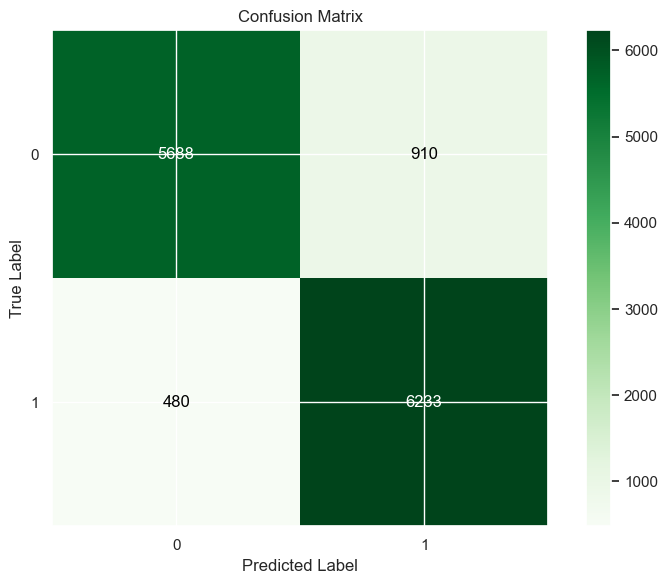

In [90]:
# Get the best estimator from the grid search
best_estimator = gridEF.best_estimator_

# Predict the labels on the test set
y_pred = best_estimator.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


###**4.8 Gradient Boosting**

Search for the best model parameters with GridSearchCV.

In [91]:
param_grid = {'n_estimators': [100,200,400],
              'learning_rate': [0.8,0.5,0.1, 0.01]}

# defining parameter range
gridGB = GridSearchCV(GradientBoostingClassifier(subsample=0.5,
                                                  max_features=4,
                                                  random_state=42), 
                                                  param_grid=param_grid, 
                                                  scoring='accuracy',
                                                  n_jobs=-1)
  
# fitting the model for grid search
gridGB.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(max_features=4,
                                                  random_state=42,
                                                  subsample=0.5),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.5, 0.1, 0.01],
                         'n_estimators': [100, 200, 400]},
             scoring='accuracy')

Get the best parameters.

In [92]:
print(gridGB.best_params_)

{'learning_rate': 0.8, 'n_estimators': 400}


Prediction according to this model.

In [93]:
y_pred_test = gridGB.predict(X_test)
y_pred_train = gridGB.predict(X_train)

Overfitting Checking:

In [94]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9469750231267345
0.9362932912628653


There is low overfitting, the model results are excellent.

**The model predicts strokes with a high accuracy of 94.7%.**

**Highest Recall value**

Model metrics:

In [95]:
resultsGB = train_evaluate_model(y_test)
resultsGB.index = ['Gradient Boosting - Method 1']
results = pd.concat([results, resultsGB])
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.822778,0.831223,0.799697,0.865336,0.822407,0.822407
Logistic Regression - Method 1,0.663361,0.627669,0.709696,0.562640,0.664239,0.664239
Naive Bayes - Method 1,0.650515,0.600824,0.708561,0.521525,0.651639,0.651639
Support Vector Machine - Method 1,0.825182,0.834671,0.797881,0.875019,0.824748,0.824748
Decision Trees - Method 1,0.951844,0.951989,0.957367,0.946671,0.951889,0.951889
Random Forest - Method 1,0.938171,0.939923,0.921557,0.959035,0.937990,0.937990
Extra Trees - Method 1,0.895575,0.899682,0.872603,0.928497,0.895288,0.895288
Gradient Boosting - Method 1,0.936293,0.939437,0.902319,0.979741,0.935915,0.935915


Confusion Matrix

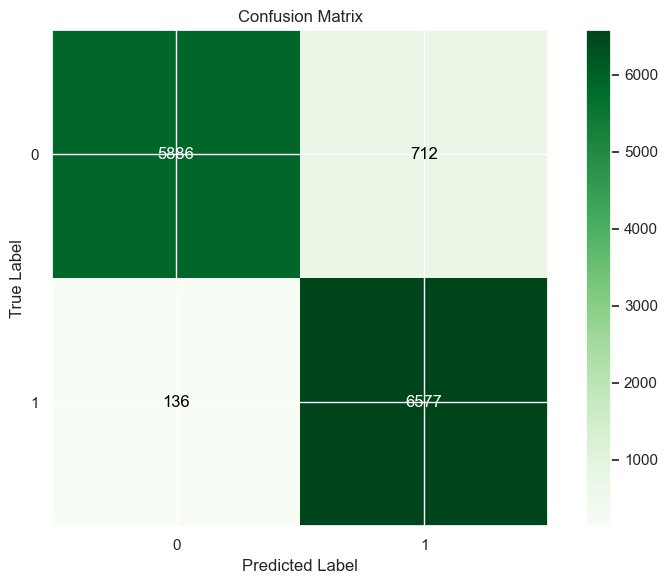

In [96]:
# Get the best estimator from the grid search
best_estimator = gridGB.best_estimator_

# Predict the labels on the test set
y_pred = best_estimator.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


###**4.9 Ada Boost**

Search for the best model parameters with GridSearchCV.

In [97]:
param_grid = {'n_estimators': [100,200,400],
              'learning_rate': [1,0.8,0.5,0.1, 0.01]}
AB = AdaBoostClassifier(DecisionTreeClassifier(max_features=4))
# defining parameter range
gridAB = GridSearchCV(AB,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)
# fitting the model for grid search
gridAB.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_features=4)),
             n_jobs=-1,
             param_grid={'learning_rate': [1, 0.8, 0.5, 0.1, 0.01],
                         'n_estimators': [100, 200, 400]},
             scoring='accuracy')

Get the best parameters.

In [98]:
print(gridAB.best_params_)

{'learning_rate': 0.01, 'n_estimators': 200}


Prediction according to this model.

In [99]:
y_pred_test = gridAB.predict(X_test)
y_pred_train = gridAB.predict(X_train)

Overfitting Checking:

In [100]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9917853839037928
0.9377206821425889


There is low overfitting, the model results are very good.

**The model predicts strokes with a high accuracy of 99.2%.**

Model metrics:

In [101]:
resultsAB = train_evaluate_model(y_test)
resultsAB.index = ['Ada Boost - Method 1']
results = pd.concat([results, resultsAB])
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.822778,0.831223,0.799697,0.865336,0.822407,0.822407
Logistic Regression - Method 1,0.663361,0.627669,0.709696,0.562640,0.664239,0.664239
Naive Bayes - Method 1,0.650515,0.600824,0.708561,0.521525,0.651639,0.651639
Support Vector Machine - Method 1,0.825182,0.834671,0.797881,0.875019,0.824748,0.824748
Decision Trees - Method 1,0.951844,0.951989,0.957367,0.946671,0.951889,0.951889
Random Forest - Method 1,0.938171,0.939923,0.921557,0.959035,0.937990,0.937990
Extra Trees - Method 1,0.895575,0.899682,0.872603,0.928497,0.895288,0.895288
Gradient Boosting - Method 1,0.936293,0.939437,0.902319,0.979741,0.935915,0.935915
Ada Boost - Method 1,0.937721,0.938995,0.927865,0.950395,0.937610,0.937610


Confusion Matrix

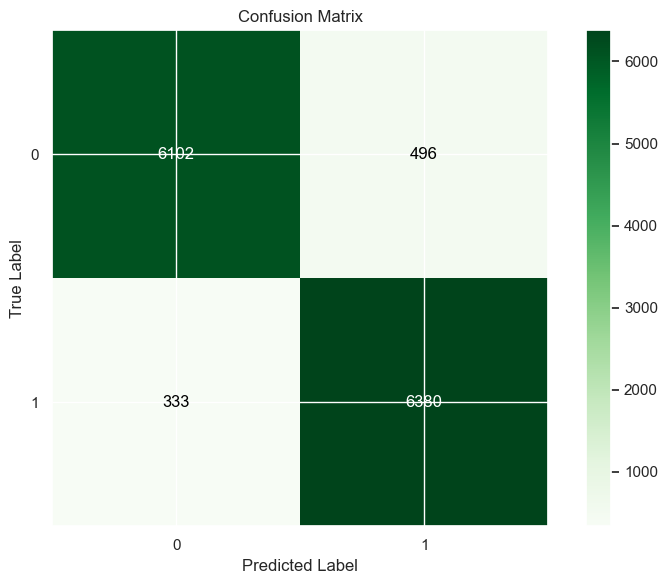

In [102]:
# Get the best estimator from the grid search
best_estimator = gridAB.best_estimator_

# Predict the labels on the test set
y_pred = best_estimator.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


###**4.10 Stacking Voting**

Search for the best model parameters with GridSearchCV.
I chose as estimators the two algorithms with the highest accuracy.

In [103]:
# The combined model--Decision Trees and Random Forest
estimators = [('Decision Trees', gridDT), ('Random Forest', gridRF)]
VC = VotingClassifier(estimators, voting='soft')
VC = VC.fit(X_train, y_train)

In [104]:
import pickle
# Open a file in binary write mode and save the model
with open(r'..Webpage\model\VC.pickle', 'wb') as file:
    pickle.dump(VC, file)

Prediction according to this model.

In [105]:
y_pred_test = VC.predict(X_test)
y_pred_train = VC.predict(X_train)

Overfitting Checking:

In [106]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9917853839037928
0.9567275185936444


There is low overfitting, the model results are excellent.

**The model predicts strokes with a high accuracy of 99.2%.**

Model metrics:

In [107]:
resultsVC = train_evaluate_model(y_test)
resultsVC.index = ['Stacking Voting - Method 1']
results = pd.concat([results, resultsVC])
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.822778,0.831223,0.799697,0.865336,0.822407,0.822407
Logistic Regression - Method 1,0.663361,0.627669,0.709696,0.562640,0.664239,0.664239
Naive Bayes - Method 1,0.650515,0.600824,0.708561,0.521525,0.651639,0.651639
Support Vector Machine - Method 1,0.825182,0.834671,0.797881,0.875019,0.824748,0.824748
Decision Trees - Method 1,0.951844,0.951989,0.957367,0.946671,0.951889,0.951889
Random Forest - Method 1,0.938171,0.939923,0.921557,0.959035,0.937990,0.937990
Extra Trees - Method 1,0.895575,0.899682,0.872603,0.928497,0.895288,0.895288
Gradient Boosting - Method 1,0.936293,0.939437,0.902319,0.979741,0.935915,0.935915
Ada Boost - Method 1,0.937721,0.938995,0.927865,0.950395,0.937610,0.937610
Stacking Voting - Method 1,0.956728,0.957117,0.956690,0.957545,0.956720,0.956720


In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

estimators = [('Decision Trees', gridDT), ('Random Forest', gridRF)]
VC = VotingClassifier(estimators, voting='soft')
VC = VC.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(VC, X, y, cv=5)  # 5-fold cross-validation

# Predict on the test set
y_pred = VC.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Accuracy Score: 0.9567275185936444
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6598
           1       0.96      0.96      0.96      6713

    accuracy                           0.96     13311
   macro avg       0.96      0.96      0.96     13311
weighted avg       0.96      0.96      0.96     13311

Confusion Matrix:
[[6307  291]
 [ 285 6428]]
Cross-Validation Scores: [0.95500744 0.96529069 0.95202678 0.95946448 0.96715012]
Mean CV Accuracy: 0.959787901142016


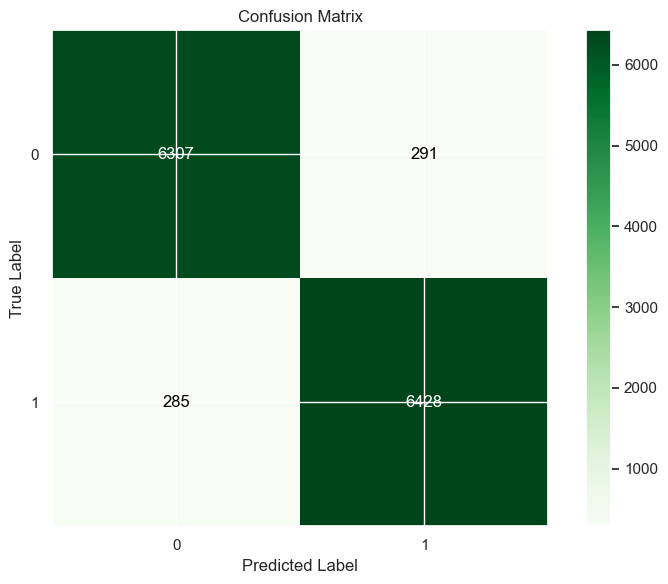

In [109]:
# Get the best estimator from the grid search
best_estimator = VC

# Predict the labels on the test set
y_pred = best_estimator.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#**5. Data Preparation 2 - *With* Features Selection**

###**5.1 General Preparations**

In [110]:
#Loading the data If not run EDA
data = pd.read_csv(r'..Stroke\stroke_data.csv')
data["sex"].fillna(0, inplace = True) #fill 1 instead NA in the gender column
data = data.drop(data[data.age < 0].index) #drop rows with negative age
data = data.drop(columns = ['avg_glucose_level'])

###**5.2 Values with low frequency**

Only 1.3 percent of the data are divided into the values "children", "never worked". In addition, neither of these two values had a stroke. This data can cause biases, so I will drop these records.

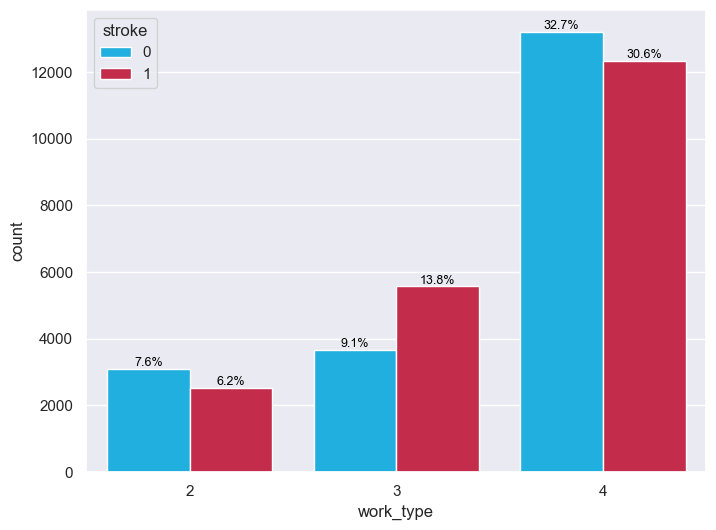

In [111]:
# Assuming 'data' is your DataFrame
data.drop(data[data['work_type'] <= 1].index, inplace=True)

plt.figure(figsize=(8, 6))
x = sns.countplot(x="work_type", hue='stroke', data=data, palette=['deepskyblue', 'crimson'])
for z in x.patches:
    height = z.get_height()
    x.annotate('{:.1f}%'.format((height / len(data)) * 100), (z.get_x() + z.get_width() / 2., height),
                ha="center", va="bottom", fontsize=9, color='black')

plt.show()

The "work_type" feature is of the Nominal Variable type. Therefore One Hot Encoder must be activated here.

In [112]:
data.work_type[data['work_type'] == 2] = 'Govt job'
data.work_type[data['work_type'] == 3] = 'Self-employed'
data.work_type[data['work_type'] == 4] = 'Private'
one_hot_encode_cols = ['work_type']  # filtering by string categoricals
# Encode these columns as categoricals so one hot encoding works on split data (if desired)
for col in one_hot_encode_cols:
    data[col] = pd.Categorical(data[col])
# Do the one hot encoding
data = pd.get_dummies(data, columns=one_hot_encode_cols)
data.head()

,sex,age,hypertension,heart_disease,ever_married,Residence_type,bmi,smoking_status,stroke,work_type_Govt job,work_type_Private,work_type_Self-employed
0,1.0,63.0,0,1,1,1,36.6,1,1,False,True,False
1,1.0,42.0,0,1,1,0,32.5,0,1,False,True,False
2,0.0,61.0,0,0,1,1,34.4,1,1,False,True,False
3,1.0,41.0,1,0,1,0,24.0,0,1,False,False,True
4,1.0,85.0,0,0,1,1,29.0,1,1,False,True,False


Scaling the data for features selection. Now I use the MinMaxScaler method.

In [113]:
mms = MinMaxScaler()
data[['bmi']] = mms.fit_transform(data[['bmi']])
data[['age']] = mms.fit_transform(data[['age']])
data.head()

,sex,age,hypertension,heart_disease,ever_married,Residence_type,bmi,smoking_status,stroke,work_type_Govt job,work_type_Private,work_type_Self-employed
0,1.0,0.611650,0,1,1,1,0.311801,1,1,False,True,False
1,1.0,0.407767,0,1,1,0,0.260870,0,1,False,True,False
2,0.0,0.592233,0,0,1,1,0.284472,1,1,False,True,False
3,1.0,0.398058,1,0,1,0,0.155280,0,1,False,False,True
4,1.0,0.825243,0,0,1,1,0.217391,1,1,False,True,False


In [114]:
y = (data['stroke']).astype(int)
X = data.loc[:, data.columns != 'stroke']  # everything except "stroke"

###**5.3 Features Selection**

In this method, I will test several methodologies for features selection for the model. I will analyze the results and build a new DF based on the most influential features to predict stroke.

*Method 1*

[0.01227439 0.09894605 0.06821721 0.05396277 0.03871846 0.03241259
 0.64221155 0.02446058 0.00735136 0.00921557 0.01222948]


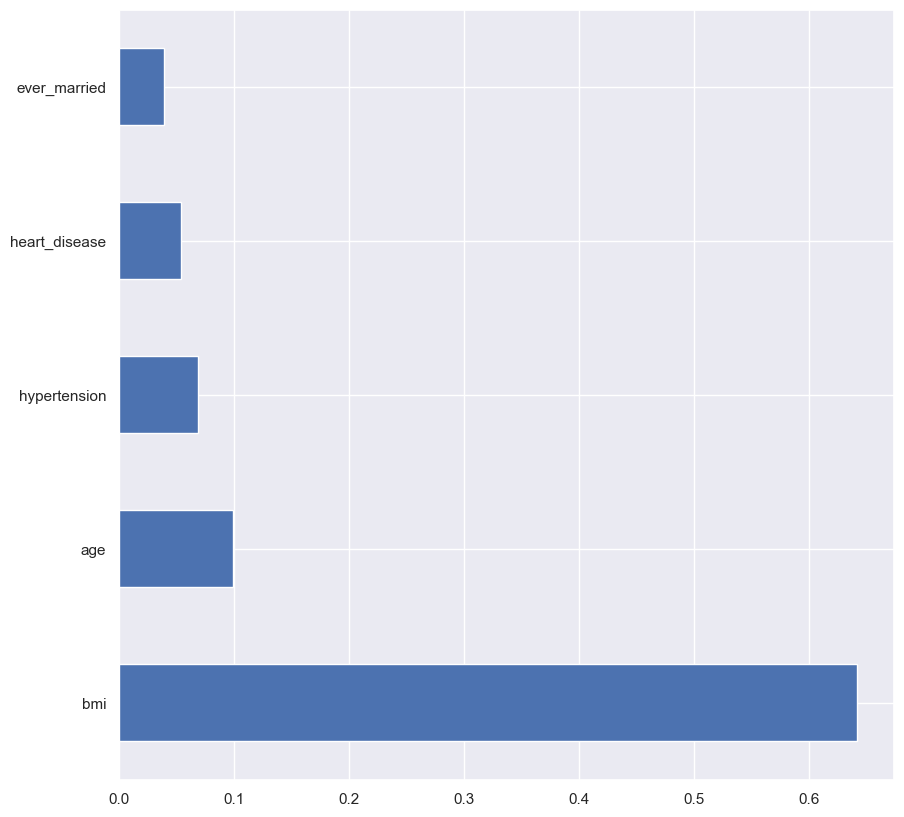

In [115]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

According to this graph, the 5 most influential features are:

1.   bmi
2.   age
3.   hypertension
4.   heart_disease
5.   ever_married



*Method 2*

In [116]:
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 5 best features

                      Specs        Score
2              hypertension  2014.129903
3             heart_disease  1713.612125
10  work_type_Self-employed   351.338984
0                       sex   234.286137
4              ever_married   174.096370


According to this graph, the 5 most influential features are:


1.   hypertension
2.   heart_disease
3.   work_type_Self-employed
4.   sex
5.   ever_married


*Method 3*

In [117]:
#Create a logistic regression classifier
lr = LogisticRegression()
# Create an EFS object
efs = EFS(estimator=lr,        # Use logistic regression as the classifier/estimator
          min_features=1,      # The minimum number of features to consider is 1
          max_features=5,      # The maximum number of features to consider is 5
          scoring='accuracy',  # The metric to use to evaluate the classifier is accuracy 
          cv=4)                # The number of cross-validations to perform is 4

# Train EFS with our dataset
efs = efs.fit(X, y)
# Print the results
print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ shows the best score 
print('Best subset (indices):', efs.best_idx_)       # best_idx_ shows the index of features that yield the best score 
print('Best subset (corresponding names):', efs.best_feature_names_) # best_feature_names_ shows the feature names 

Features: 1023/1023

Best accuracy score: 0.66
Best subset (indices): (0, 2, 3, 10)
Best subset (corresponding names): ('sex', 'hypertension', 'heart_disease', 'work_type_Self-employed')


According to this graph, the 5 most influential features are:

1.   sex
2.   hypertension
3.   heart_disease
4.   work_type_Self-employed

**A feature that appears twice in the results, as one of the 5 most influential will be in the model. If a feature was ranked in one of the first three places (according to one of the methods) and was not included in the model, it will also be included.** 


---


**The features were chosen after considering the EDA chapter..**



---

*The features in the new model are:*

1.   *hypertension*
2.   *heart_disease*
3.   *ever_married*
4.   *work_type_Self-employed*
4.   *bmi*




###**5.4 Skewness Checking**

In [118]:
data_skew = data[['age','bmi']]
skew = pd.DataFrame(data_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
print(skew)

         skew  too_skewed
age -0.067617       False
bmi  1.100130        True


There is 1 column with high Skewness.
Therefore, we will normalize them using the QuantileTransformer method.

In [119]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
data[['bmi']] = qt.fit_transform(data[['bmi']])

In [120]:
data_skew = data[['age','bmi']]
skew = pd.DataFrame(data_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
age,-0.067617,False
bmi,-0.022171,False


Now, the columns are not skewed.

###**5.5 Data Splitting**

The classes are balanced so there is no reason use StratifiedShuffleSplit.


In [121]:
y = (data['stroke']).astype(int)
X = data.loc[:, data.columns != 'stroke']  # everything except "stroke"
X =  X[['hypertension', 'heart_disease', 'work_type_Self-employed', 'ever_married', 'bmi']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [122]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

stroke
1    0.504277
0    0.495723
Name: proportion, dtype: float64
stroke
1    0.508088
0    0.491912
Name: proportion, dtype: float64


#**6. ML - Models 2**

###**6.1 K Nearest Neighbors**

Search for the best model parameters with GridSearchCV.

In [123]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19],  #odd numbers because there are 2 classes in target coulmn
              'weights': ['distance', 'uniform']}  
gridKNN = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gridKNN.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.875 total time=   0.0s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.878 total time=   0.1s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.885 total time=   0.0s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.895 total time=   0.0s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.883 total time=   0.0s
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.875 total time=   0.2s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.878 total time=   0.3s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.885 total time=   0.2s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.895 total time=   0.2s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.883 total time=   0.2s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.907 total time=   0.0s
[CV 2/5] END ...n_neighbors=3, weights=distance

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['distance', 'uniform']},
             verbose=3)

Get the best parameters.

In [124]:
print(gridKNN.best_params_)

{'n_neighbors': 19, 'weights': 'distance'}


1NN is the best parameter for prediction. There will probably be an overfitting here.


Prediction according to this model.

In [125]:
y_pred_test = gridKNN.predict(X_test)
y_pred_train = gridKNN.predict(X_train)

Overfitting checking:

In [126]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9237221602413124
0.9223427331887202


there is NO overfitting.The model results are low.

The model metrics:

In [127]:
resultsKNN2 = train_evaluate_model(y_test)
resultsKNN2.index = ['K Nearest Neighbors - Method 2']
results = pd.concat([results, resultsKNN2])
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.822778,0.831223,0.799697,0.865336,0.822407,0.822407
Logistic Regression - Method 1,0.663361,0.627669,0.709696,0.562640,0.664239,0.664239
Naive Bayes - Method 1,0.650515,0.600824,0.708561,0.521525,0.651639,0.651639
Support Vector Machine - Method 1,0.825182,0.834671,0.797881,0.875019,0.824748,0.824748
Decision Trees - Method 1,0.951844,0.951989,0.957367,0.946671,0.951889,0.951889
Random Forest - Method 1,0.938171,0.939923,0.921557,0.959035,0.937990,0.937990
Extra Trees - Method 1,0.895575,0.899682,0.872603,0.928497,0.895288,0.895288
Gradient Boosting - Method 1,0.936293,0.939437,0.902319,0.979741,0.935915,0.935915
Ada Boost - Method 1,0.937721,0.938995,0.927865,0.950395,0.937610,0.937610
Stacking Voting - Method 1,0.956728,0.957117,0.956690,0.957545,0.956720,0.956720


Confusion Matrix

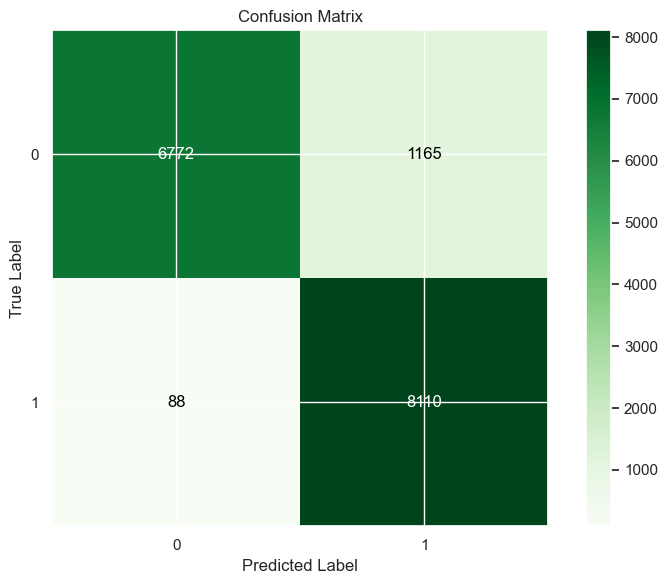

In [128]:
# Get the best estimator from the grid search
best_estimator = gridKNN

# Predict the labels on the test set
y_pred = best_estimator.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


###**6.2 Logistic Regression**

Building a simple logistic regression model.

In [129]:
LG = LogisticRegression().fit(X_train, y_train)
#prediction
y_pred_test = LG.predict(X_test)
y_pred_train = LG.predict(X_train)
#scores
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.6500144622123053
0.6559652928416486


Low score. Building a model with regularization.

In [130]:
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

with tf.device(device_name):

  # defining parameter range
  param_grid = {'penalty':['l1','l2'],
                'Cs': [2,5,10,20], 
                'cv': [4],
                'solver': ['liblinear','saga']}  
  gridLG = GridSearchCV(LogisticRegressionCV(), param_grid, refit = True, verbose = 3)
    
  # fitting the model for grid search
  gridLG.fit(X_train, y_train)

No GPU, using /device:CPU:0.
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.642 total time=   0.0s
[CV 3/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.643 total time=   0.0s
[CV 4/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.650 total time=   0.1s
[CV 5/5] END Cs=2, cv=4, penalty=l1, solver=liblinear;, score=0.654 total time=   0.0s
[CV 1/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.667 total time=   0.1s
[CV 2/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.642 total time=   0.1s
[CV 3/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.643 total time=   0.1s
[CV 4/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.650 total time=   0.1s
[CV 5/5] END Cs=2, cv=4, penalty=l1, solver=saga;, score=0.654 total time=   0.1s
[CV 1/5] END Cs=2, cv=4, penalty=l2, solver=liblinear;, score=0.6

Get the best parameters.

In [131]:
print(gridLG.best_params_)

{'Cs': 10, 'cv': 4, 'penalty': 'l2', 'solver': 'liblinear'}


Prediction according to this model.

In [132]:
y_pred_test = gridLG.predict(X_test)
y_pred_train = gridLG.predict(X_train)

Overfitting checking:

In [133]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.652039171935044
0.6585063526495197


There is no overfitting, but the model results are poor.

**The model predicts strokes with a low accuracy of 68.7%.**

The model metrics:

In [134]:
resultsLG2 = train_evaluate_model(y_test)
resultsLG2.index = ['Logistic Regression - Method 2']
results = pd.concat([results, resultsLG2])
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.822778,0.831223,0.799697,0.865336,0.822407,0.822407
Logistic Regression - Method 1,0.663361,0.627669,0.709696,0.562640,0.664239,0.664239
Naive Bayes - Method 1,0.650515,0.600824,0.708561,0.521525,0.651639,0.651639
Support Vector Machine - Method 1,0.825182,0.834671,0.797881,0.875019,0.824748,0.824748
Decision Trees - Method 1,0.951844,0.951989,0.957367,0.946671,0.951889,0.951889
Random Forest - Method 1,0.938171,0.939923,0.921557,0.959035,0.937990,0.937990
Extra Trees - Method 1,0.895575,0.899682,0.872603,0.928497,0.895288,0.895288
Gradient Boosting - Method 1,0.936293,0.939437,0.902319,0.979741,0.935915,0.935915
Ada Boost - Method 1,0.937721,0.938995,0.927865,0.950395,0.937610,0.937610
Stacking Voting - Method 1,0.956728,0.957117,0.956690,0.957545,0.956720,0.956720


Confusion Matrix

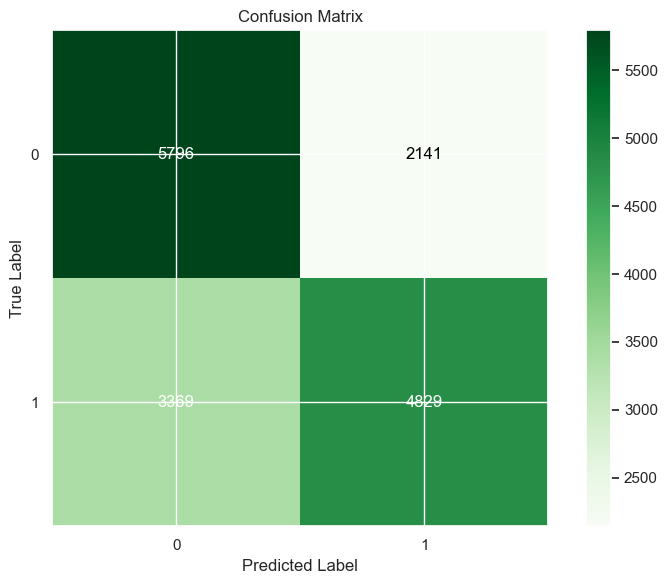

In [135]:
# Get the best estimator from the grid search
best_estimator = gridLG

# Predict the labels on the test set
y_pred = best_estimator.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


**In method 2 as in method 1, logistic regression is not a good model for predicting stroke.**

###**6.3 Naive Bayes**

I will test the algorithm with the two methods that fit the data: Gaussian and Bernoulli.

In [136]:
cv_N = 10
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB()
      }
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X_train, y_train, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.6439813819164951, 'bernoulli': 0.644229008571692}

The effectiveness of the methods is similar. The prediction results are not good.

In [137]:
# fitting the model
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

Prediction according to this model.

In [138]:
y_pred_test = GNB.predict(X_test)
y_pred_train = GNB.predict(X_train)

In [139]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.6453039130614437
0.6477223427331887


There is no overfitting, but the model results are poor.

The model metrics:

**The model predicts strokes with a low accuracy of 64.9%.**

In [140]:
resultsNB2 = train_evaluate_model(y_test)
resultsNB2.index = ['Naive Bayes - Method 2']
results = pd.concat([results, resultsNB2])
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.822778,0.831223,0.799697,0.865336,0.822407,0.822407
Logistic Regression - Method 1,0.663361,0.627669,0.709696,0.562640,0.664239,0.664239
Naive Bayes - Method 1,0.650515,0.600824,0.708561,0.521525,0.651639,0.651639
Support Vector Machine - Method 1,0.825182,0.834671,0.797881,0.875019,0.824748,0.824748
Decision Trees - Method 1,0.951844,0.951989,0.957367,0.946671,0.951889,0.951889
Random Forest - Method 1,0.938171,0.939923,0.921557,0.959035,0.937990,0.937990
Extra Trees - Method 1,0.895575,0.899682,0.872603,0.928497,0.895288,0.895288
Gradient Boosting - Method 1,0.936293,0.939437,0.902319,0.979741,0.935915,0.935915
Ada Boost - Method 1,0.937721,0.938995,0.927865,0.950395,0.937610,0.937610
Stacking Voting - Method 1,0.956728,0.957117,0.956690,0.957545,0.956720,0.956720


Confusion Matrix

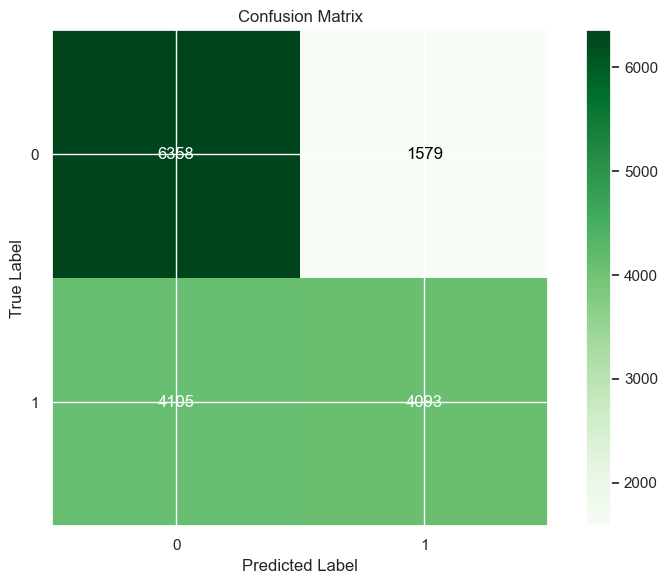

In [141]:
# Get the best estimator from the grid search
best_estimator = GNB

# Predict the labels on the test set
y_pred = best_estimator.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


**In method 2 as in method 1, Naive Bayes is not a good model for predicting stroke.**

###**6.4 Support Vector Machine**

Search for the best model parameters with GridSearchCV.

In [142]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

with tf.device(device_name):
  param_grid = {'C': [1,10,100,1000], 
                'gamma': [1, 0.1, 0.01, 0.001],
                'kernel': ['rbf']} 
    
  gridSVM = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=2)
    
  # fitting the model for grid search
  gridSVM.fit(X_train, y_train)

No GPU, using /device:CPU:0.
Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.670 total time=  13.6s
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.680 total time=  13.8s
[CV 1/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.649 total time=  13.5s
[CV 2/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.654 total time=  14.5s
[CV 1/2] END .......C=1, gamma=0.01, kernel=rbf;, score=0.649 total time=  13.8s
[CV 2/2] END .......C=1, gamma=0.01, kernel=rbf;, score=0.654 total time=  14.2s
[CV 1/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.649 total time=  16.0s
[CV 2/2] END ......C=1, gamma=0.001, kernel=rbf;, score=0.654 total time=  15.9s
[CV 1/2] END .........C=10, gamma=1, kernel=rbf;, score=0.677 total time=  18.9s
[CV 2/2] END .........C=10, gamma=1, kernel=rbf;, score=0.686 total time=  16.1s
[CV 1/2] END .......C=10, gamma=0.1, kernel=rbf;, score=0.660 total time=  18.1s
[CV 2/2] END ......

Get the best parameters.

In [143]:
print(gridSVM.best_params_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


Prediction according to this model.

In [144]:
y_pred_test = gridSVM.predict(X_test)
y_pred_train = gridSVM.predict(X_train)

Overfitting checking:

In [145]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.6937729845874138
0.6989773783700031


There no overfitting, but the model results are not bad.

**The model predicts stroke with an accuracy of 88.6%.**

Model metrics:

In [146]:
resultsSVM2 = train_evaluate_model(y_test)
resultsSVM2.index = ['Support Vector Machine - Method 2']
results = pd.concat([results, resultsSVM2])
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.822778,0.831223,0.799697,0.865336,0.822407,0.822407
Logistic Regression - Method 1,0.663361,0.627669,0.709696,0.562640,0.664239,0.664239
Naive Bayes - Method 1,0.650515,0.600824,0.708561,0.521525,0.651639,0.651639
Support Vector Machine - Method 1,0.825182,0.834671,0.797881,0.875019,0.824748,0.824748
Decision Trees - Method 1,0.951844,0.951989,0.957367,0.946671,0.951889,0.951889
Random Forest - Method 1,0.938171,0.939923,0.921557,0.959035,0.937990,0.937990
Extra Trees - Method 1,0.895575,0.899682,0.872603,0.928497,0.895288,0.895288
Gradient Boosting - Method 1,0.936293,0.939437,0.902319,0.979741,0.935915,0.935915
Ada Boost - Method 1,0.937721,0.938995,0.927865,0.950395,0.937610,0.937610
Stacking Voting - Method 1,0.956728,0.957117,0.956690,0.957545,0.956720,0.956720


Confusion Matrix

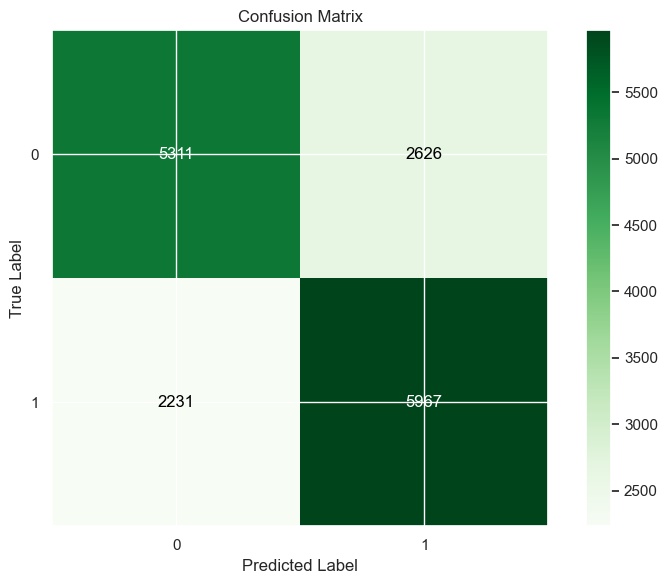

In [147]:
# Get the best estimator from the grid search
best_estimator = gridSVM

# Predict the labels on the test set
y_pred = best_estimator.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


**In method 2 unlike method 1, Support Vector Machine is not such a good model for stroke prediction.**

###**6.5 Decision Tree**

Building a model without restrictions.

In [148]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

Building a model with restrictions - Search for the best model parameters with GridSearchCV.

In [149]:
#dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

# defining parameter range
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}  
gridDT = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, n_jobs=-1)
  
# fitting the model for grid search
gridDT.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 29, 2),
                         'max_features': range(1, 6)})

Get the best parameters.

In [150]:
print(gridDT.best_params_)

{'max_depth': 27, 'max_features': 1}


Prediction according to this model.

In [151]:
y_pred_test = gridDT.predict(X_test)
y_pred_train = gridDT.predict(X_train)

Overfitting Checking:

In [152]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9261187554233297
0.9239541369693214


There is no overfitting, the model results are excellent.

**The model predicts strokes with a high accuracy of 99.9%.**

Model metrics:

In [153]:
resultsDT2 = train_evaluate_model(y_test)
resultsDT2.index = ['Decision Trees - Method 2']
results = pd.concat([results, resultsDT2])
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.822778,0.831223,0.799697,0.865336,0.822407,0.822407
Logistic Regression - Method 1,0.663361,0.627669,0.709696,0.562640,0.664239,0.664239
Naive Bayes - Method 1,0.650515,0.600824,0.708561,0.521525,0.651639,0.651639
Support Vector Machine - Method 1,0.825182,0.834671,0.797881,0.875019,0.824748,0.824748
Decision Trees - Method 1,0.951844,0.951989,0.957367,0.946671,0.951889,0.951889
Random Forest - Method 1,0.938171,0.939923,0.921557,0.959035,0.937990,0.937990
Extra Trees - Method 1,0.895575,0.899682,0.872603,0.928497,0.895288,0.895288
Gradient Boosting - Method 1,0.936293,0.939437,0.902319,0.979741,0.935915,0.935915
Ada Boost - Method 1,0.937721,0.938995,0.927865,0.950395,0.937610,0.937610
Stacking Voting - Method 1,0.956728,0.957117,0.956690,0.957545,0.956720,0.956720


Confusion Matrix

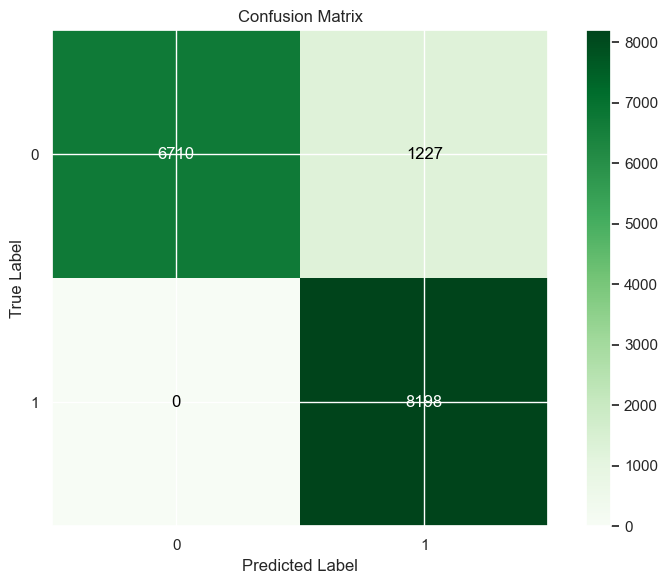

In [154]:
# Get the best estimator from the grid search
best_estimator = gridDT

# Predict the labels on the test set
y_pred = best_estimator.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


###**6.6 Random Forest**

Search for the best model parameters with GridSearchCV.

In [155]:
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

# defining parameter range
param_grid = {'n_estimators':[15, 20, 30, 40, 50, 100, 150, 200, 300, 400]
              }  
gridRF = GridSearchCV(RF, param_grid)
  
# fitting the model for grid search
gridRF.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42,
                                              warm_start=True),
             param_grid={'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200,
                                          300, 400]})

Get the best parameters.

In [156]:
print(gridRF.best_params_)

{'n_estimators': 50}


Prediction according to this model.

In [157]:
y_pred_test = gridRF.predict(X_test)
y_pred_train = gridRF.predict(X_train)

Overfitting Checking:

In [158]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9261187554233297
0.9239541369693214


There is no overfitting, the model results are excellent.

Model metrics:

In [159]:
resultsRF2 = train_evaluate_model(y_test)
resultsRF2.index = ['Random Forest - Method 2']
results = pd.concat([results, resultsRF2])
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.822778,0.831223,0.799697,0.865336,0.822407,0.822407
Logistic Regression - Method 1,0.663361,0.627669,0.709696,0.562640,0.664239,0.664239
Naive Bayes - Method 1,0.650515,0.600824,0.708561,0.521525,0.651639,0.651639
Support Vector Machine - Method 1,0.825182,0.834671,0.797881,0.875019,0.824748,0.824748
Decision Trees - Method 1,0.951844,0.951989,0.957367,0.946671,0.951889,0.951889
Random Forest - Method 1,0.938171,0.939923,0.921557,0.959035,0.937990,0.937990
Extra Trees - Method 1,0.895575,0.899682,0.872603,0.928497,0.895288,0.895288
Gradient Boosting - Method 1,0.936293,0.939437,0.902319,0.979741,0.935915,0.935915
Ada Boost - Method 1,0.937721,0.938995,0.927865,0.950395,0.937610,0.937610
Stacking Voting - Method 1,0.956728,0.957117,0.956690,0.957545,0.956720,0.956720


Confusion Matrix

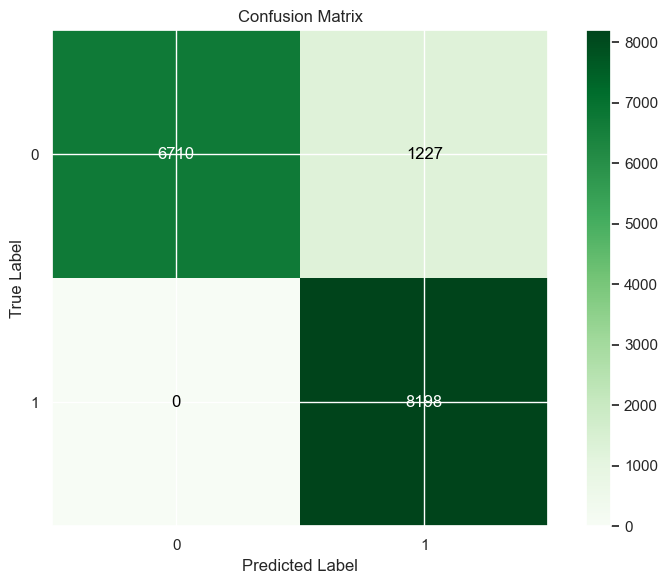

In [160]:
# Get the best estimator from the grid search
best_estimator = gridRF

# Predict the labels on the test set
y_pred = best_estimator.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


###**6.7 Extra Trees**

Search for the best model parameters with GridSearchCV.

In [161]:
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

# defining parameter range
param_grid = {'n_estimators':[15, 20, 30, 40, 50, 100, 150, 200, 300, 400]
              }  
gridEF = GridSearchCV(EF, param_grid)
  
# fitting the model for grid search
gridEF.fit(X_train, y_train)

GridSearchCV(estimator=ExtraTreesClassifier(bootstrap=True, n_jobs=-1,
                                            oob_score=True, random_state=42,
                                            warm_start=True),
             param_grid={'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200,
                                          300, 400]})

Get the best parameters.

In [162]:
print(gridEF.best_params_)

{'n_estimators': 40}


Prediction according to this model.

In [163]:
y_pred_test = gridEF.predict(X_test)
y_pred_train = gridEF.predict(X_train)

Overfitting Checking:

In [164]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9261187554233297
0.9243259993802293


Model metrics:

In [165]:
resultsEF2 = train_evaluate_model(y_test)
resultsEF2.index = ['Extra Trees - Method 2']
results = pd.concat([results, resultsEF2])
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.822778,0.831223,0.799697,0.865336,0.822407,0.822407
Logistic Regression - Method 1,0.663361,0.627669,0.709696,0.562640,0.664239,0.664239
Naive Bayes - Method 1,0.650515,0.600824,0.708561,0.521525,0.651639,0.651639
Support Vector Machine - Method 1,0.825182,0.834671,0.797881,0.875019,0.824748,0.824748
Decision Trees - Method 1,0.951844,0.951989,0.957367,0.946671,0.951889,0.951889
Random Forest - Method 1,0.938171,0.939923,0.921557,0.959035,0.937990,0.937990
Extra Trees - Method 1,0.895575,0.899682,0.872603,0.928497,0.895288,0.895288
Gradient Boosting - Method 1,0.936293,0.939437,0.902319,0.979741,0.935915,0.935915
Ada Boost - Method 1,0.937721,0.938995,0.927865,0.950395,0.937610,0.937610
Stacking Voting - Method 1,0.956728,0.957117,0.956690,0.957545,0.956720,0.956720


Confusion Matrix

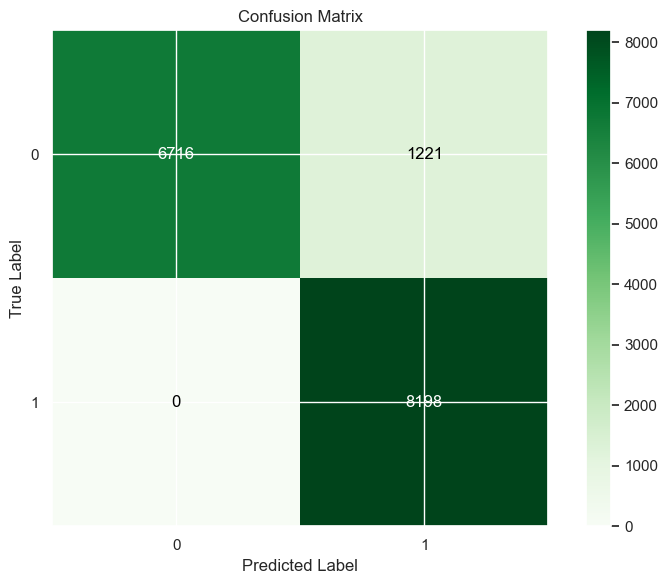

In [166]:
# Get the best estimator from the grid search
best_estimator = gridEF

# Predict the labels on the test set
y_pred = best_estimator.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


###**6.8 Gradient Boosting**

Search for the best model parameters with GridSearchCV.

In [167]:
param_grid = {'n_estimators': [100,200,400],
              'learning_rate': [0.8,0.5,0.1, 0.01]}

# defining parameter range
gridGB = GridSearchCV(GradientBoostingClassifier(subsample=0.5,
                                                  max_features=4,
                                                  random_state=42), 
                                                  param_grid=param_grid, 
                                                  scoring='accuracy',
                                                  n_jobs=-1)
  
# fitting the model for grid search
gridGB.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(max_features=4,
                                                  random_state=42,
                                                  subsample=0.5),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.5, 0.1, 0.01],
                         'n_estimators': [100, 200, 400]},
             scoring='accuracy')

Get the best parameters.

In [168]:
print(gridGB.best_params_)

{'learning_rate': 0.8, 'n_estimators': 400}


Prediction according to this model.

In [169]:
y_pred_test = gridGB.predict(X_test)
y_pred_train = gridGB.predict(X_train)

Overfitting Checking:

In [170]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9224412214371307
0.9191819026960025


Model metrics:

In [171]:
resultsGB2 = train_evaluate_model(y_test)
resultsGB2.index = ['Gradient Boosting - Method 2']
results = pd.concat([results, resultsGB2])
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.822778,0.831223,0.799697,0.865336,0.822407,0.822407
Logistic Regression - Method 1,0.663361,0.627669,0.709696,0.562640,0.664239,0.664239
Naive Bayes - Method 1,0.650515,0.600824,0.708561,0.521525,0.651639,0.651639
Support Vector Machine - Method 1,0.825182,0.834671,0.797881,0.875019,0.824748,0.824748
Decision Trees - Method 1,0.951844,0.951989,0.957367,0.946671,0.951889,0.951889
Random Forest - Method 1,0.938171,0.939923,0.921557,0.959035,0.937990,0.937990
Extra Trees - Method 1,0.895575,0.899682,0.872603,0.928497,0.895288,0.895288
Gradient Boosting - Method 1,0.936293,0.939437,0.902319,0.979741,0.935915,0.935915
Ada Boost - Method 1,0.937721,0.938995,0.927865,0.950395,0.937610,0.937610
Stacking Voting - Method 1,0.956728,0.957117,0.956690,0.957545,0.956720,0.956720


Confusion Matrix

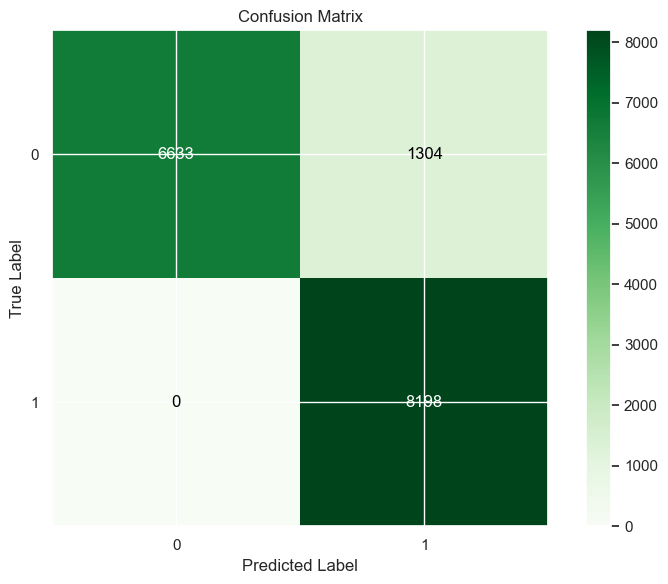

In [172]:
# Get the best estimator from the grid search
best_estimator = gridGB

# Predict the labels on the test set
y_pred = best_estimator.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


###**6.9 Ada Boost**

Search for the best model parameters with GridSearchCV.

In [173]:
param_grid = {'n_estimators': [100,200,400],
              'learning_rate': [1,0.8,0.5,0.1, 0.01]}
AB = AdaBoostClassifier(DecisionTreeClassifier(max_features=4))
# defining parameter range
gridAB = GridSearchCV(AB,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)
# fitting the model for grid search
gridAB.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_features=4)),
             n_jobs=-1,
             param_grid={'learning_rate': [1, 0.8, 0.5, 0.1, 0.01],
                         'n_estimators': [100, 200, 400]},
             scoring='accuracy')

Get the best parameters.

In [174]:
print(gridAB.best_params_)

{'learning_rate': 0.8, 'n_estimators': 200}


Prediction according to this model.

In [175]:
y_pred_test = gridAB.predict(X_test)
y_pred_train = gridAB.predict(X_train)

Overfitting Checking:

In [176]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9261187554233297
0.9243259993802293


Model metrics:

In [177]:
resultsAB2 = train_evaluate_model(y_test)
resultsAB2.index = ['Ada Boost - Method 2']
results = pd.concat([results, resultsAB2])
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.822778,0.831223,0.799697,0.865336,0.822407,0.822407
Logistic Regression - Method 1,0.663361,0.627669,0.709696,0.562640,0.664239,0.664239
Naive Bayes - Method 1,0.650515,0.600824,0.708561,0.521525,0.651639,0.651639
Support Vector Machine - Method 1,0.825182,0.834671,0.797881,0.875019,0.824748,0.824748
Decision Trees - Method 1,0.951844,0.951989,0.957367,0.946671,0.951889,0.951889
Random Forest - Method 1,0.938171,0.939923,0.921557,0.959035,0.937990,0.937990
Extra Trees - Method 1,0.895575,0.899682,0.872603,0.928497,0.895288,0.895288
Gradient Boosting - Method 1,0.936293,0.939437,0.902319,0.979741,0.935915,0.935915
Ada Boost - Method 1,0.937721,0.938995,0.927865,0.950395,0.937610,0.937610
Stacking Voting - Method 1,0.956728,0.957117,0.956690,0.957545,0.956720,0.956720


Confusion Matrix

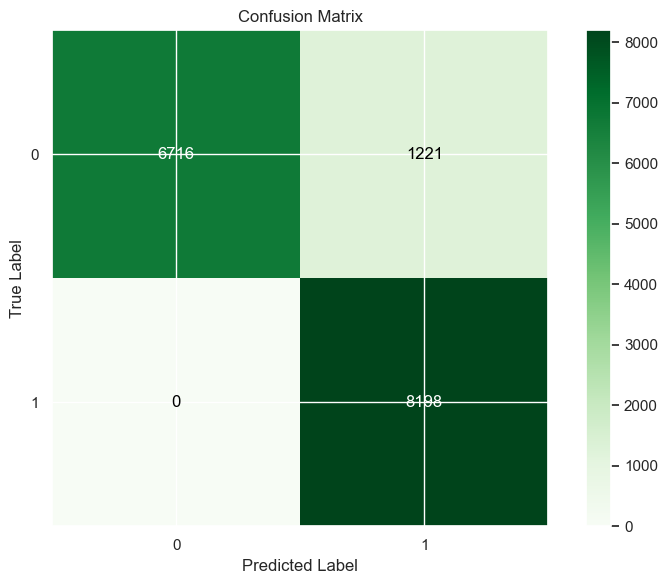

In [178]:
# Get the best estimator from the grid search
best_estimator = gridAB

# Predict the labels on the test set
y_pred = best_estimator.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


###**6.10 Stacking Voting**

Search for the best model parameters with GridSearchCV.
I chose as estimators the two algorithms with the highest accuracy.

In [179]:
# The combined model--KNN and Random Forest
estimators = [('KNN', gridKNN), ('Random Forest', gridRF)]
VC = VotingClassifier(estimators, voting='soft')
VC = VC.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.875 total time=   0.0s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.878 total time=   0.0s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.885 total time=   0.0s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.895 total time=   0.0s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.883 total time=   0.0s
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.875 total time=   0.2s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.878 total time=   0.2s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.885 total time=   0.2s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.895 total time=   0.2s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.883 total time=   0.2s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.907 total time=   0.0s
[CV 2/5] END ...n_neighbors=3, weights=distance

Prediction according to this model.

In [180]:
y_pred_test = VC.predict(X_test)
y_pred_train = VC.predict(X_train)

Overfitting Checking:

In [181]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9252923432915995
0.9239541369693214


Model metrics:

In [182]:
resultsVC2 = train_evaluate_model(y_test)
resultsVC2.index = ['Stacking Voting - Method 2']
results = pd.concat([results, resultsVC2])
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.822778,0.831223,0.799697,0.865336,0.822407,0.822407
Logistic Regression - Method 1,0.663361,0.627669,0.709696,0.562640,0.664239,0.664239
Naive Bayes - Method 1,0.650515,0.600824,0.708561,0.521525,0.651639,0.651639
Support Vector Machine - Method 1,0.825182,0.834671,0.797881,0.875019,0.824748,0.824748
Decision Trees - Method 1,0.951844,0.951989,0.957367,0.946671,0.951889,0.951889
Random Forest - Method 1,0.938171,0.939923,0.921557,0.959035,0.937990,0.937990
Extra Trees - Method 1,0.895575,0.899682,0.872603,0.928497,0.895288,0.895288
Gradient Boosting - Method 1,0.936293,0.939437,0.902319,0.979741,0.935915,0.935915
Ada Boost - Method 1,0.937721,0.938995,0.927865,0.950395,0.937610,0.937610
Stacking Voting - Method 1,0.956728,0.957117,0.956690,0.957545,0.956720,0.956720


Confusion Matrix

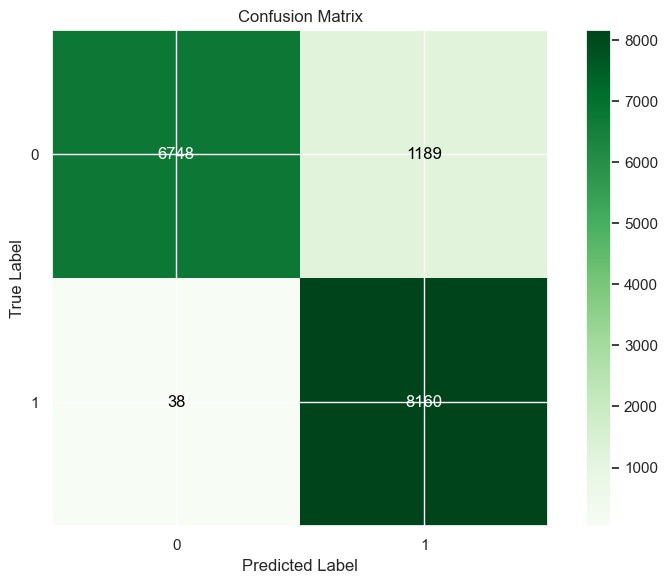

In [183]:
# Get the best estimator from the grid search
best_estimator = VC

# Predict the labels on the test set
y_pred = best_estimator.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


#**7. Summary**

###**7.1 Conclusions & Suggestions For Improvement**

In [184]:
#order the result df by accuracy from high to low.
results.sort_values(results.columns[0], ascending = False)

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
Stacking Voting - Method 1,0.956728,0.957117,0.956690,0.957545,0.956720,0.956720
Decision Trees - Method 1,0.951844,0.951989,0.957367,0.946671,0.951889,0.951889
Random Forest - Method 1,0.938171,0.939923,0.921557,0.959035,0.937990,0.937990
Ada Boost - Method 1,0.937721,0.938995,0.927865,0.950395,0.937610,0.937610
Gradient Boosting - Method 1,0.936293,0.939437,0.902319,0.979741,0.935915,0.935915
Ada Boost - Method 2,0.924326,0.930692,0.870368,1.000000,0.923082,0.923082
Extra Trees - Method 2,0.924326,0.930692,0.870368,1.000000,0.923082,0.923082
Stacking Voting - Method 2,0.923954,0.930074,0.872821,0.995365,0.922780,0.922780
Decision Trees - Method 2,0.923954,0.930375,0.869814,1.000000,0.922704,0.922704
Random Forest - Method 2,0.923954,0.930375,0.869814,1.000000,0.922704,0.922704


* Feature selection reduced model noise for most algorithms.
* The algorithms based on decision trees yield impressive results.
* The results of the Logistic Regression and Naive Bayes algorithms were not good for any method.
* The KNN algorithm showed a huge improvement between method 2 and method 1.
* Method 2 yielded 100% accuracy (without any misses) for 5 algorithms.

**Health features are more likely to affect the goal column - adding such features can improve models in the medical field.**

**According to the results in this study, using one of the models that yielded 100% accuracy can serve as an excellent tool for predicting stroke.**

**Test the models with new data can help validate the models.**